# Machine Learning-Based Prediction of Passenger Numbers in Air Transport in Ireland Considering Flight Frequency, Distance, Flight Type, and Travel Coverage (UK vs IRELAND)

In [1]:
#Setting up the environment for data analysis and visualization, configuring display settings, and handling warnings by importing all necessary libraries
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')
import warnings
warnings.filterwarnings('ignore')

# DATASET
The dataset is called Air passenger transport by aircraft model, distance bands and transport coverage. It is represented as "estat_avia_paodis_en.csv" in the european data database. Here is the link of the dataset https://data.europa.eu/data/datasets/enegplf5j8rslftcvl6k9g?locale=en.

# Data Dictionary
1. Distance bands: (distance)
- 0-300km (KM_LT300)
- 300-500km (KM300-499)
- 500-1000km (KM500-999)
- 1000km – 1500km (KM1000-1499)
- 1500- 2000km (KM1500-1999)
- greater than (>) 2000 (KM_GE2000)

2. Categories of aircraft: (aircraft)
- jumbo jet (AC_JJ)
- wide-body jet (AC_WJ)
- narrow-body jet (AC_NJ)
- regional jet (AC_RJ)
- regional turboprop (AC_RT)
- other (OTH)
- unknown  (UNK)

3. Geo- geopolitical entity
4. Time - time in years (annual)
5. tra_meas - Traffic and transport measurement
 - PAS_BRD - Passengers on board.
 - CAF_PAS
 - CAF_PAS_ARR
 - CAF_PAS_DEP
 - PAS_BRD_ARR - Passengers on board (Arrival)
 - PAS_BRD_DEP - Passengers on board (Departure)
 - CAF_PAS - Commercial passenger air flights
 - CAF_PAS_ARR- Commercial passenger air flights (arrivals) 
 - CAF_PAS_DEP - Commercial passenger air flights (departures)

6. tra_cov - Transport coverage
 - Total transport - TOTAL
 - National transport -NAT
 - International transport - INTL
 - International transport - Intra-EU27 (from 2020)INTL_IEU27_2020
 - International transport Extra-EU27 (from 2020) - INTL_XEU27_2020
7. unit - unit of measure which is numbers
8. OBS_Value is the either number of flights and number of passengers

In [2]:
#Import the Dataset
transport_df = pd.read_csv("estat_avia_paodis_en.csv")

In [3]:
#View the Dataset
transport_df

DATAFLOW        LAST UPDATE freq tra_cov     tra_meas  \
0       ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A    INTL      CAF_PAS   
1       ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A    INTL      CAF_PAS   
2       ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A    INTL      CAF_PAS   
3       ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A    INTL      CAF_PAS   
4       ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A    INTL      CAF_PAS   
...                        ...                ...  ...     ...          ...   
799003  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A   TOTAL  PAS_BRD_DEP   
799004  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A   TOTAL  PAS_BRD_DEP   
799005  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A   TOTAL  PAS_BRD_DEP   
799006  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A   TOTAL  PAS_BRD_DEP   
799007  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A   TOTAL  PAS_BRD_DEP   

       aircraft     distance unit geo  TIME_PERIOD  OBS_VALUE  OBS_FLAG  
0         AC_JJ  KM1000-1499   NR  AT         2008        576       NaN  
1         AC_JJ  KM1000-1499   NR  AT         2009       1524       NaN  
2         AC_JJ  KM1000-1499   NR  AT         2010       1197       NaN  
3         AC_JJ  KM1000-1499   NR  AT         2011        485       NaN  
4         AC_JJ  KM1000-1499   NR  AT         2012        401       NaN  
...         ...          ...  ...  ..          ...        ...       ...  
799003      UNK        TOTAL   NR  UK         2016     205176       NaN  
799004      UNK        TOTAL   NR  UK         2017     116373       NaN  
799005      UNK        TOTAL   NR  UK         2018      65103       NaN  
799006      UNK        TOTAL   NR  UK         2019         56       NaN  
799007      UNK        TOTAL   NR  UK         2020        920       NaN  

[799008 rows x 12 columns]

# EXPLORATORY DATA ANALYSIS (EDA)

This process involves:-

a) View the first and last few observations of the transport_df dataframe

b) View the number of observations and variables the transport_df dataframe has

c) View the entire transport_df dataframe to check the data types and any missing data in a particluar variable.

d) Check for any outliers

e) perform summary statistics for categorical and numeric variables

f) Visualize the data

In [4]:
#View the first observations of the dataset
transport_df.head()

DATAFLOW        LAST UPDATE freq tra_cov tra_meas aircraft  \
0  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A    INTL  CAF_PAS    AC_JJ   
1  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A    INTL  CAF_PAS    AC_JJ   
2  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A    INTL  CAF_PAS    AC_JJ   
3  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A    INTL  CAF_PAS    AC_JJ   
4  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A    INTL  CAF_PAS    AC_JJ   

      distance unit geo  TIME_PERIOD  OBS_VALUE  OBS_FLAG  
0  KM1000-1499   NR  AT         2008        576       NaN  
1  KM1000-1499   NR  AT         2009       1524       NaN  
2  KM1000-1499   NR  AT         2010       1197       NaN  
3  KM1000-1499   NR  AT         2011        485       NaN  
4  KM1000-1499   NR  AT         2012        401       NaN

### Findings
- Presence of NaN values in OBS_FLAG
- Presence of variables that will not be used in analyses e.g data flow, last update,freq, unit, OBS_FLAG

In [5]:
#View the last few observations of the dataset
transport_df.tail()

DATAFLOW        LAST UPDATE freq tra_cov     tra_meas  \
799003  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A   TOTAL  PAS_BRD_DEP   
799004  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A   TOTAL  PAS_BRD_DEP   
799005  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A   TOTAL  PAS_BRD_DEP   
799006  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A   TOTAL  PAS_BRD_DEP   
799007  ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00    A   TOTAL  PAS_BRD_DEP   

       aircraft distance unit geo  TIME_PERIOD  OBS_VALUE  OBS_FLAG  
799003      UNK    TOTAL   NR  UK         2016     205176       NaN  
799004      UNK    TOTAL   NR  UK         2017     116373       NaN  
799005      UNK    TOTAL   NR  UK         2018      65103       NaN  
799006      UNK    TOTAL   NR  UK         2019         56       NaN  
799007      UNK    TOTAL   NR  UK         2020        920       NaN

### Findings
- Presence of NaN values in OBS_FLAG
- Presence of total in the observations, total of all the categories in each variable

In [6]:
#View the dataset variables and data type
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799008 entries, 0 to 799007
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATAFLOW     799008 non-null  object 
 1   LAST UPDATE  799008 non-null  object 
 2   freq         799008 non-null  object 
 3   tra_cov      799008 non-null  object 
 4   tra_meas     799008 non-null  object 
 5   aircraft     799008 non-null  object 
 6   distance     799008 non-null  object 
 7   unit         799008 non-null  object 
 8   geo          799008 non-null  object 
 9   TIME_PERIOD  799008 non-null  int64  
 10  OBS_VALUE    799008 non-null  int64  
 11  OBS_FLAG     0 non-null       float64
dtypes: float64(1), int64(2), object(9)
memory usage: 73.2+ MB


### Findings
- Presence of NaN values in OBS_FLAG

In [7]:
#Check the shape of the datasets
transport_df.shape

(799008, 12)

### Findings
- The data is a low dimension data, i.e the number of features/variables are less than the observations

In [8]:
#Check the statistics of the continuous variables in the transport_df dataset
transport_df.describe()

TIME_PERIOD     OBS_VALUE  OBS_FLAG
count  799008.000000  7.990080e+05       0.0
mean     2015.129941  9.448917e+05       NaN
std         4.309655  1.043658e+07       NaN
min      2008.000000  0.000000e+00       NaN
25%      2011.000000  0.000000e+00       NaN
50%      2015.000000  3.760000e+02       NaN
75%      2019.000000  2.222050e+04       NaN
max      2022.000000  1.037080e+09       NaN

### Findings 
- Minimum and maximum values for year 2008 and 2022
- The observation has outliers

In [9]:
#Check the statistics of the discrete variables in transport_df
transport_df.describe(include="object")

DATAFLOW        LAST UPDATE    freq tra_cov tra_meas  \
count                   799008             799008  799008  799008   799008   
unique                       1                  1       1       5        6   
top     ESTAT:AVIA_PAODIS(1.0)  06/12/23 23:00:00       A    INTL  CAF_PAS   
freq                    799008             799008  799008  172032   133168   

       aircraft     distance    unit     geo  
count    799008       799008  799008  799008  
unique        8            7       1      37  
top       AC_JJ  KM1000-1499      NR      AT  
freq      99876       114144  799008   25200

### Findings
- tra_cov has 5 categories
- tra_meas has 6 categories
- aircraft has 8 categories
- distance has 7 categories

In [10]:
#Checking for missing data in the transport_df DataFrame
transport_df.isnull().sum()

DATAFLOW            0
LAST UPDATE         0
freq                0
tra_cov             0
tra_meas            0
aircraft            0
distance            0
unit                0
geo                 0
TIME_PERIOD         0
OBS_VALUE           0
OBS_FLAG       799008
dtype: int64

### Findings
- Presence of missing data values in OBS_FLAG variables

In [11]:
#Checking for duplicates in the transport_df DataFrame
transport_df.duplicated().sum()

0

### Findings
- No duplicates in the dataset

In [12]:
#Checking the number of categories present in each variable and their count in the transport_df DataFrame
#Create a List of variables containing categories
categorical_columns = ['tra_meas', 'tra_cov', 'geo','TIME_PERIOD', 'aircraft', 'distance'] 

#Create a for loop that loops through each column to check categories and their frequencies
for column in categorical_columns:
    category_counts = transport_df[column].value_counts()
    print(f"Column: {column}")
    print(category_counts)
    print("\n")

Column: tra_meas
CAF_PAS        133168
CAF_PAS_ARR    133168
CAF_PAS_DEP    133168
PAS_BRD        133168
PAS_BRD_ARR    133168
PAS_BRD_DEP    133168
Name: tra_meas, dtype: int64


Column: tra_cov
INTL               172032
NAT                172032
TOTAL              172032
INTL_IEU27_2020    141456
INTL_XEU27_2020    141456
Name: tra_cov, dtype: int64


Column: geo
AT           25200
PL           25200
NL           25200
MT           25200
RO           25200
SE           25200
LV           25200
LU           25200
LT           25200
IT           25200
SI           25200
IE           25200
HU           25200
HR           25200
FR           25200
FI           25200
EU27_2020    25200
ES           25200
EL           25200
EE           25200
DK           25200
DE           25200
CZ           25200
CY           25200
SK           25200
BG           25200
BE           25200
PT           25200
IS           15120
NO           15120
CH           15120
UK           13104
TR           11088
MK   

### Findings
- Presence of Total of each column and each category in the dataset. This needs to be dropped
- Presence of OTH (Others) and UNK (unknown) in the aircraft. Need to be dropped because they are not important in drawing conclusions
- geo represents all countries including UK and Ireland
- In tra_cov there is INTL_IEU27_2020 and INTL_XEU27_2020, which equal INT when summed up. Drop both and retain only INT
- CAF_PAS is the summation of CAF_PAS_ARR and CAF_PAS_DEP. PAS_BRD is the summation of PAS_BRD_ARR and PAS_BRD_DEP. Drop all other categories and remain with only CAF_PAS and PAS_BRD.
- Number of passengers and number of flights have been combined, need to be separated

## Checking for outliers in number of passengers and number of flights

### OUTLIERS IN NUMBER OF PASSENGERS VARIABLE

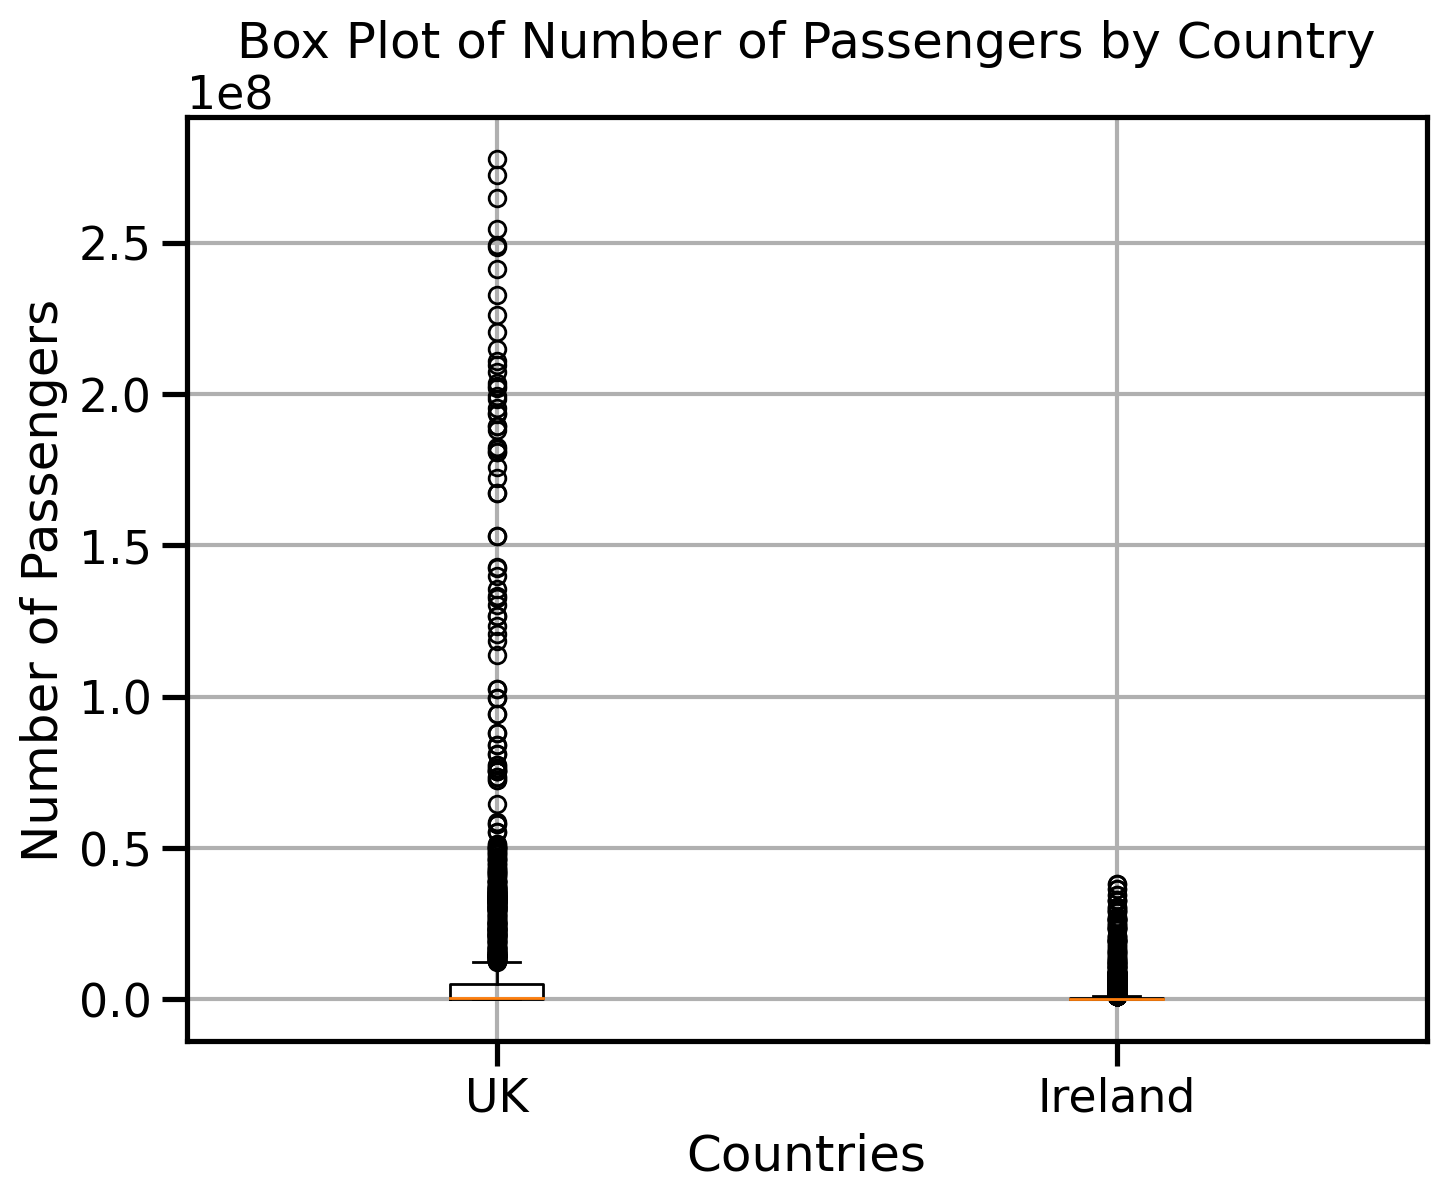

In [13]:
#Filter number of Passengers from the tra_meas variable
passenger_outlier = transport_df[transport_df['tra_meas'] == 'PAS_BRD']

#Filter data for ireland and UK
uk_coverage = passenger_outlier[passenger_outlier['geo'] == 'UK']['OBS_VALUE']
ie_coverage = passenger_outlier[passenger_outlier['geo'] == 'IE']['OBS_VALUE']

#Creating box plots for Ireland and UK
plt.figure(figsize=(8, 6))
plt.boxplot([uk_coverage, ie_coverage], labels=['UK', 'Ireland'])
plt.xlabel('Countries')
plt.ylabel('Number of Passengers')
plt.title('Box Plot of Number of Passengers by Country')
plt.grid(True)
plt.show()

### Findings
- Presence of Outliers in both countries

## OUTLIERS IN NUMBER OF FLIGHTS VARIABLE

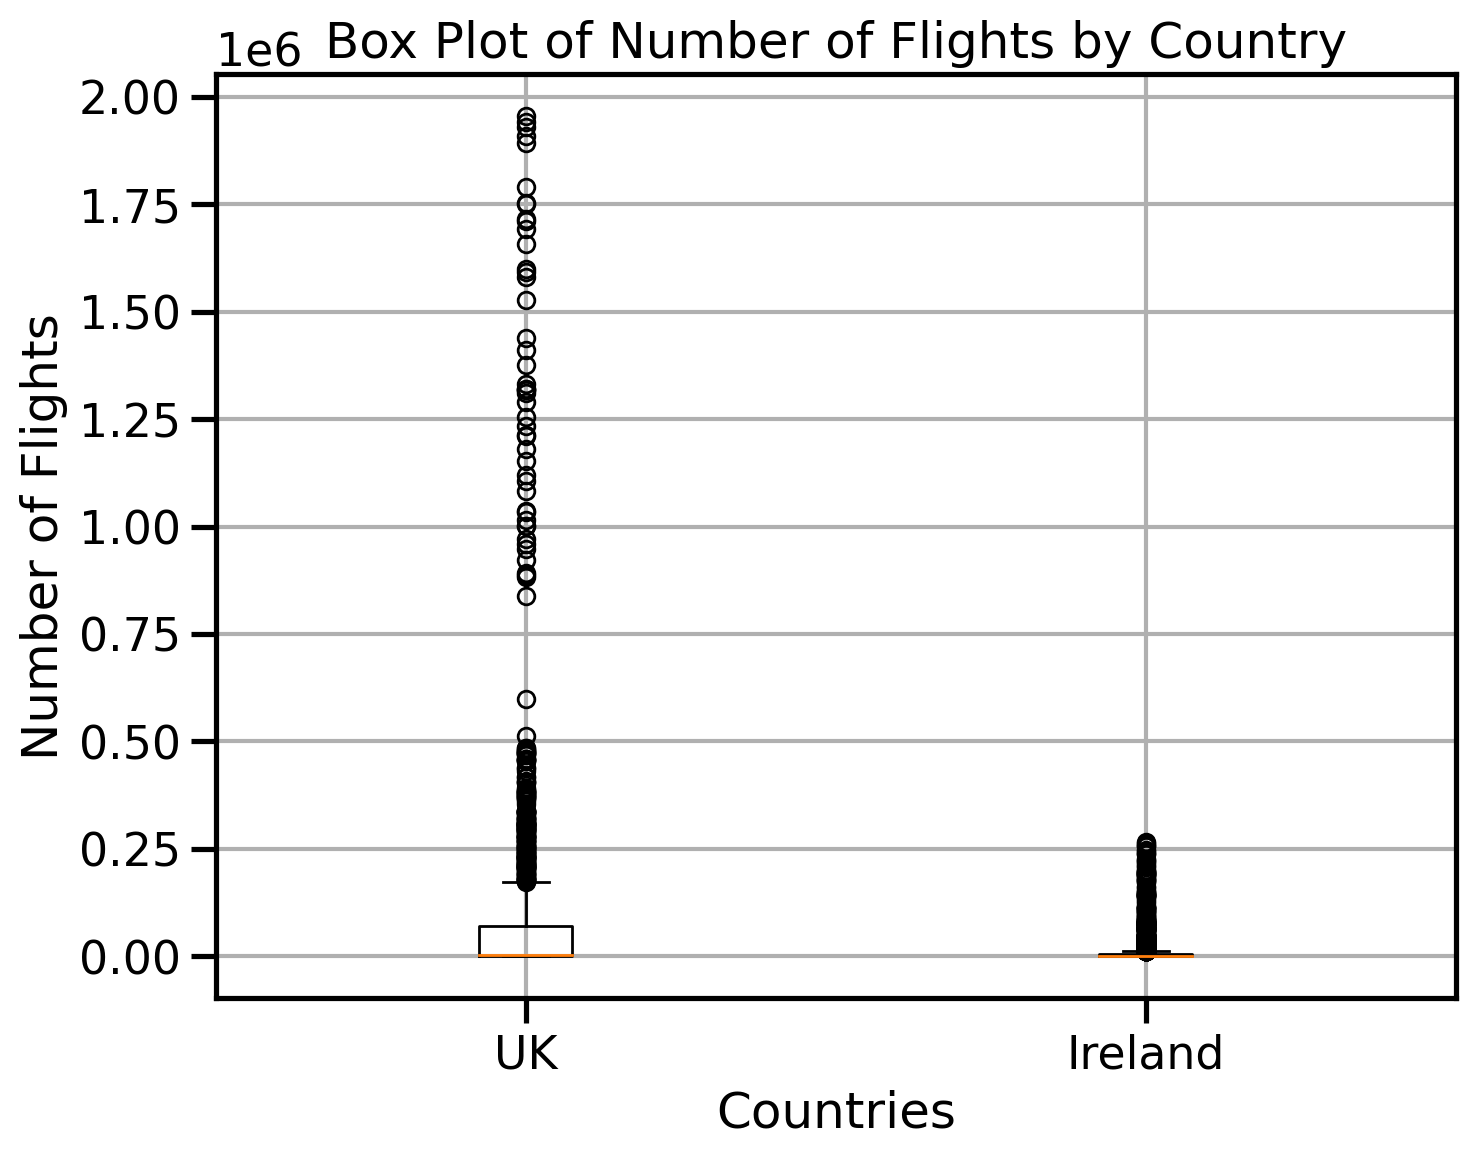

In [14]:
#Checking for outliers in number of flights in the tra_meas variable
flight_outlier = transport_df[transport_df['tra_meas'] == 'CAF_PAS']

#Filter data for ireland and UK
uk_coverage = flight_outlier[flight_outlier['geo'] == 'UK']['OBS_VALUE']
ie_coverage = flight_outlier[flight_outlier['geo'] == 'IE']['OBS_VALUE']

#Creating box plots for Ireland and UK
plt.figure(figsize=(8, 6))
plt.boxplot([uk_coverage, ie_coverage], labels=['UK', 'Ireland'])
plt.xlabel('Countries')
plt.ylabel('Number of Flights')
plt.title('Box Plot of Number of Flights by Country')
plt.grid(True)
plt.show()

# DATA CLEANING AND PREPARATION
This process involved the following steps:-

a) Handling Missing Data

b) Handling Duplicates if any

c) Encoding categorical variables

d) Handling dimensionality issues

e)Drop the irrelevant rows/columns present

f)Dropping variables that wont be used

g) Handling outliers

e) transforming the data using merge

## Drop variables that will not be used in any analysis process
- Variables DATAFLOW', 'LAST UPDATE', 'freq','unit', 'OBS_FLAG are labels and not meaningful for any analyses

In [15]:
# Drop variables that will not be used in any analysis process
column_to_drop = ['DATAFLOW', 'LAST UPDATE', 'freq','unit', 'OBS_FLAG']
transport_df.drop(column_to_drop, axis=1, inplace=True)

In [16]:
#View to check if they have been dropped
transport_df

tra_cov     tra_meas aircraft     distance geo  TIME_PERIOD  OBS_VALUE
0         INTL      CAF_PAS    AC_JJ  KM1000-1499  AT         2008        576
1         INTL      CAF_PAS    AC_JJ  KM1000-1499  AT         2009       1524
2         INTL      CAF_PAS    AC_JJ  KM1000-1499  AT         2010       1197
3         INTL      CAF_PAS    AC_JJ  KM1000-1499  AT         2011        485
4         INTL      CAF_PAS    AC_JJ  KM1000-1499  AT         2012        401
...        ...          ...      ...          ...  ..          ...        ...
799003   TOTAL  PAS_BRD_DEP      UNK        TOTAL  UK         2016     205176
799004   TOTAL  PAS_BRD_DEP      UNK        TOTAL  UK         2017     116373
799005   TOTAL  PAS_BRD_DEP      UNK        TOTAL  UK         2018      65103
799006   TOTAL  PAS_BRD_DEP      UNK        TOTAL  UK         2019         56
799007   TOTAL  PAS_BRD_DEP      UNK        TOTAL  UK         2020        920

[799008 rows x 7 columns]

### Findings
- They have been dropped.

## Drop the values that correspond to total in the distance variable and use the actual values
The value total is the summation of all the distance categories. should be dropped and use the actual categories to see which distance is more preferred

In [17]:
#Drop Total from the Distance variable
distance_to_keep = ['KM1000-1499', 'KM1500-1999','KM300-499','KM500-999','KM_GE2000', 'KM_LT300']

#Filter the DataFrame to keep all the distances groups except the total in the 'distance' variable
transport_df = transport_df[transport_df['distance'].isin(distance_to_keep)]

In [18]:
#Check if total has been dropped
distance_counts = transport_df['distance'].value_counts()
distance_counts

KM1000-1499    114144
KM1500-1999    114144
KM300-499      114144
KM500-999      114144
KM_GE2000      114144
KM_LT300       114144
Name: distance, dtype: int64

### Findings
- Total has been dropped

## Drop OTH, UKNOWN and Total from aircraft variable
- There will be no inference being drawn from other and unknown flights for this analyses. Focus is on the known aircrafts

In [19]:
#Drop Other, unknown and total observations from aircraft variable
aircraft_to_keep = ['AC_JJ', 'AC_NJ','AC_RJ','AC_RT','AC_WJ']

#Filter the DataFrame to keep only ['AC_JJ', 'AC_NJ','AC_RJ','AC_RT','AC_WJ'] in the aircraft variable
transport_df = transport_df[transport_df['aircraft'].isin(aircraft_to_keep)]

In [20]:
#Check if total, oth and unknown have been dropped
aircraft_counts = transport_df['aircraft'].value_counts()
aircraft_counts

AC_JJ    85608
AC_NJ    85608
AC_RJ    85608
AC_RT    85608
AC_WJ    85608
Name: aircraft, dtype: int64

### Findings
- They have been dropped

## Drop all other categories of transport coverage expect INT and NAT
- The other categories add up to INT i.e INTL_IEU27_2020 and INTL_XEU27_2020, equal INT when summed up. Total also is the summation of all the categories. For this analyses the categories are used instead to make for better comparison

In [21]:
#Drop all the categories in transport coverage except INT and NAT
tra_cov_to_keep = ['INTL', 'NAT']

#Filter AND Keep only INT and NAT
transport_df = transport_df[transport_df['tra_cov'].isin(tra_cov_to_keep)]

In [22]:
#Check if the categories have been dropped
transport_counts = transport_df['tra_cov'].value_counts()
transport_counts

INTL    92160
NAT     92160
Name: tra_cov, dtype: int64

### Findings
- They have been dropped

## Drop all other categories of traffic and transport measurements expect CAF_PAS and PAS_BRD
- They are dropped because when the other categories summed up they make CAF_PAS (CAF_PAS_ARR and CAF_PAS_DEP), PAS_BRD (PAS_BRD_ARR and PAS_BRD_DEP)

In [23]:
#Create a list of categories to keep
tra_mea_to_keep = ['CAF_PAS','PAS_BRD']

# Filter transport_df to keep only CAF_PAS, PAS_BRD in the tra_meas variable
transport_df = transport_df[transport_df['tra_meas'].isin(tra_mea_to_keep)]

In [24]:
#Check if the other categories have been dropped
tra_mea_counts = transport_df['tra_meas'].value_counts()
tra_mea_counts

CAF_PAS    30720
PAS_BRD    30720
Name: tra_meas, dtype: int64

### Findings
- They have been dropped

In [25]:
#Check all the categories present in the variables after cleaning
categorical_columns = ['tra_meas', 'tra_cov','TIME_PERIOD', 'aircraft', 'distance'] 

#Create a for loop that loops through each column to check categories and their frequencies
for column in categorical_columns:
    category_counts = transport_df[column].value_counts()
    print(f"Column: {column}")
    print(category_counts)
    print("\n")

Column: tra_meas
CAF_PAS    30720
PAS_BRD    30720
Name: tra_meas, dtype: int64


Column: tra_cov
INTL    30720
NAT     30720
Name: tra_cov, dtype: int64


Column: TIME_PERIOD
2016    4320
2017    4320
2018    4320
2019    4320
2020    4320
2021    4320
2022    4200
2015    4080
2012    3960
2013    3960
2014    3960
2008    3840
2009    3840
2010    3840
2011    3840
Name: TIME_PERIOD, dtype: int64


Column: aircraft
AC_JJ    12288
AC_NJ    12288
AC_RJ    12288
AC_RT    12288
AC_WJ    12288
Name: aircraft, dtype: int64


Column: distance
KM1000-1499    10240
KM1500-1999    10240
KM300-499      10240
KM500-999      10240
KM_GE2000      10240
KM_LT300       10240
Name: distance, dtype: int64




## Drop Data from 2021 and 2022 since the its missing in the UK data

In [26]:
#Drop year 2021 and 2022
transport_df = transport_df[~transport_df['TIME_PERIOD'].isin([2021, 2022])]

In [27]:
#Check if the year 2021 and 2022 have been dropped
categorical_columns = ['tra_meas', 'tra_cov', 'TIME_PERIOD', 'aircraft', 'distance'] 

#Create a for loop that loops through each column to check categories and their frequencies
for column in categorical_columns:
    category_counts = transport_df[column].value_counts()
    print(f"Column: {column}")
    print(category_counts)
    print("\n")

Column: tra_meas
CAF_PAS    26460
PAS_BRD    26460
Name: tra_meas, dtype: int64


Column: tra_cov
INTL    26460
NAT     26460
Name: tra_cov, dtype: int64


Column: TIME_PERIOD
2016    4320
2017    4320
2018    4320
2019    4320
2020    4320
2015    4080
2012    3960
2013    3960
2014    3960
2008    3840
2009    3840
2010    3840
2011    3840
Name: TIME_PERIOD, dtype: int64


Column: aircraft
AC_JJ    10584
AC_NJ    10584
AC_RJ    10584
AC_RT    10584
AC_WJ    10584
Name: aircraft, dtype: int64


Column: distance
KM1000-1499    8820
KM1500-1999    8820
KM300-499      8820
KM500-999      8820
KM_GE2000      8820
KM_LT300       8820
Name: distance, dtype: int64




### Findings
- The year 2021 and 2022 have been dropped

In [28]:
#Check if the data has any missing data values
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52920 entries, 0 to 558367
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tra_cov      52920 non-null  object
 1   tra_meas     52920 non-null  object
 2   aircraft     52920 non-null  object
 3   distance     52920 non-null  object
 4   geo          52920 non-null  object
 5   TIME_PERIOD  52920 non-null  int64 
 6   OBS_VALUE    52920 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.2+ MB


### Findings
- There is no Missing Data

In [29]:
#Reset the transport_df dataframe index after cleaning
transport_df.reset_index(drop=True, inplace=True)

In [30]:
#View to see if the dataframe has been reset
transport_df

tra_cov tra_meas aircraft     distance geo  TIME_PERIOD  OBS_VALUE
0        INTL  CAF_PAS    AC_JJ  KM1000-1499  AT         2008        576
1        INTL  CAF_PAS    AC_JJ  KM1000-1499  AT         2009       1524
2        INTL  CAF_PAS    AC_JJ  KM1000-1499  AT         2010       1197
3        INTL  CAF_PAS    AC_JJ  KM1000-1499  AT         2011        485
4        INTL  CAF_PAS    AC_JJ  KM1000-1499  AT         2012        401
...       ...      ...      ...          ...  ..          ...        ...
52915     NAT  PAS_BRD    AC_WJ     KM_LT300  UK         2016       5688
52916     NAT  PAS_BRD    AC_WJ     KM_LT300  UK         2017       3746
52917     NAT  PAS_BRD    AC_WJ     KM_LT300  UK         2018       3793
52918     NAT  PAS_BRD    AC_WJ     KM_LT300  UK         2019      29784
52919     NAT  PAS_BRD    AC_WJ     KM_LT300  UK         2020      17593

[52920 rows x 7 columns]

### Findings
-The dataframe has been reset

In [31]:
#Dropped all the other countries in geo variable except UK and Ireland
selected_countries = ['UK', 'IE']
transport_df = transport_df[transport_df['geo'].isin(selected_countries)]

In [32]:
#Check if the other countries have dropped
categorical_columns = ['tra_meas', 'tra_cov', 'TIME_PERIOD', 'aircraft', 'distance','geo'] 

#Create a for loop that loops through each column to check categories and their frequencies
for column in categorical_columns:
    category_counts = transport_df[column].value_counts()
    print(f"Column: {column}")
    print(category_counts)
    print("\n")

Column: tra_meas
CAF_PAS    1560
PAS_BRD    1560
Name: tra_meas, dtype: int64


Column: tra_cov
INTL    1560
NAT     1560
Name: tra_cov, dtype: int64


Column: TIME_PERIOD
2008    240
2009    240
2010    240
2011    240
2012    240
2013    240
2014    240
2015    240
2016    240
2017    240
2018    240
2019    240
2020    240
Name: TIME_PERIOD, dtype: int64


Column: aircraft
AC_JJ    624
AC_NJ    624
AC_RJ    624
AC_RT    624
AC_WJ    624
Name: aircraft, dtype: int64


Column: distance
KM1000-1499    520
KM1500-1999    520
KM300-499      520
KM500-999      520
KM_GE2000      520
KM_LT300       520
Name: distance, dtype: int64


Column: geo
IE    1560
UK    1560
Name: geo, dtype: int64




### Findings
They have dropped

### Transform the data structure, The variable OBS_VALUE is number of passengers and number of flights combined. These makes the variable OBS_VALUE have outliers because there is a difference between the transport measures passengers on board and commercial passenger flights.

In [33]:
#Split the data into passenger data and flight data
passengers_data = transport_df[transport_df['tra_meas'] == 'PAS_BRD']
flight_data = transport_df[transport_df['tra_meas'] == 'CAF_PAS']

In [34]:
#View the passengers dataset
passengers_data.head()

tra_cov tra_meas aircraft     distance geo  TIME_PERIOD  OBS_VALUE
13438    INTL  PAS_BRD    AC_JJ  KM1000-1499  IE         2008      62358
13439    INTL  PAS_BRD    AC_JJ  KM1000-1499  IE         2009      31836
13440    INTL  PAS_BRD    AC_JJ  KM1000-1499  IE         2010      12687
13441    INTL  PAS_BRD    AC_JJ  KM1000-1499  IE         2011       9886
13442    INTL  PAS_BRD    AC_JJ  KM1000-1499  IE         2012       8710

### Findings
- The dataset has 7 variables, 5 categorical variables, 1 nominal integer and 1 integer

In [35]:
#View the flight dataset
flight_data.head()

tra_cov tra_meas aircraft     distance geo  TIME_PERIOD  OBS_VALUE
208    INTL  CAF_PAS    AC_JJ  KM1000-1499  IE         2008        331
209    INTL  CAF_PAS    AC_JJ  KM1000-1499  IE         2009        175
210    INTL  CAF_PAS    AC_JJ  KM1000-1499  IE         2010         70
211    INTL  CAF_PAS    AC_JJ  KM1000-1499  IE         2011         53
212    INTL  CAF_PAS    AC_JJ  KM1000-1499  IE         2012         48

### Findings
The dataset has 7 variables, 5 categorical variables, 1 nominal integer and 1 integer

In [36]:
#merge the passengers_data and Flight_data on 5 variables that are common on both datasets
transport_data = pd.merge(passengers_data, flight_data, on=["tra_cov", "aircraft","distance", "TIME_PERIOD", "geo"])

In [37]:
#View the head of the transport data
transport_data.head()

tra_cov tra_meas_x aircraft     distance geo  TIME_PERIOD  OBS_VALUE_x  \
0    INTL    PAS_BRD    AC_JJ  KM1000-1499  IE         2008        62358   
1    INTL    PAS_BRD    AC_JJ  KM1000-1499  IE         2009        31836   
2    INTL    PAS_BRD    AC_JJ  KM1000-1499  IE         2010        12687   
3    INTL    PAS_BRD    AC_JJ  KM1000-1499  IE         2011         9886   
4    INTL    PAS_BRD    AC_JJ  KM1000-1499  IE         2012         8710   

  tra_meas_y  OBS_VALUE_y  
0    CAF_PAS          331  
1    CAF_PAS          175  
2    CAF_PAS           70  
3    CAF_PAS           53  
4    CAF_PAS           48

### Findings
- The dataset has 9 variables, 6 categorical variables, 1 nominal integer and 2 integer variables.
- Presence of columns that mean the same, need to drop them and remain with only one of each variables

In [38]:
#View the info of the transport_data
transport_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tra_cov      1560 non-null   object
 1   tra_meas_x   1560 non-null   object
 2   aircraft     1560 non-null   object
 3   distance     1560 non-null   object
 4   geo          1560 non-null   object
 5   TIME_PERIOD  1560 non-null   int64 
 6   OBS_VALUE_x  1560 non-null   int64 
 7   tra_meas_y   1560 non-null   object
 8   OBS_VALUE_y  1560 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 121.9+ KB


### Findings
- No missing data
- presence of duplicate columns

In [39]:
#Rename the names of the OBS_VALUE_x, OBS_VALUE_y
transport_data = transport_data.rename(columns={
    'OBS_VALUE_x': 'Number of Passengers',
    'OBS_VALUE_y': 'Number of Flights'
})

In [40]:
#Check if the variables have been renamed
transport_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tra_cov               1560 non-null   object
 1   tra_meas_x            1560 non-null   object
 2   aircraft              1560 non-null   object
 3   distance              1560 non-null   object
 4   geo                   1560 non-null   object
 5   TIME_PERIOD           1560 non-null   int64 
 6   Number of Passengers  1560 non-null   int64 
 7   tra_meas_y            1560 non-null   object
 8   Number of Flights     1560 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 121.9+ KB


### Findings
- The variables have been renamed

In [41]:
#Drop columns that will not be used
transport_data = transport_data.drop(['tra_meas_x', 'tra_meas_y'], axis=1)
transport_data

tra_cov aircraft     distance geo  TIME_PERIOD  Number of Passengers  \
0       INTL    AC_JJ  KM1000-1499  IE         2008                 62358   
1       INTL    AC_JJ  KM1000-1499  IE         2009                 31836   
2       INTL    AC_JJ  KM1000-1499  IE         2010                 12687   
3       INTL    AC_JJ  KM1000-1499  IE         2011                  9886   
4       INTL    AC_JJ  KM1000-1499  IE         2012                  8710   
...      ...      ...          ...  ..          ...                   ...   
1555     NAT    AC_WJ     KM_LT300  UK         2016                  5688   
1556     NAT    AC_WJ     KM_LT300  UK         2017                  3746   
1557     NAT    AC_WJ     KM_LT300  UK         2018                  3793   
1558     NAT    AC_WJ     KM_LT300  UK         2019                 29784   
1559     NAT    AC_WJ     KM_LT300  UK         2020                 17593   

      Number of Flights  
0                   331  
1                   175  
2                    70  
3                    53  
4                    48  
...                 ...  
1555                 54  
1556                 31  
1557                 43  
1558                197  
1559                154  

[1560 rows x 7 columns]

In [42]:
#View to check if the variables have been dropped
transport_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tra_cov               1560 non-null   object
 1   aircraft              1560 non-null   object
 2   distance              1560 non-null   object
 3   geo                   1560 non-null   object
 4   TIME_PERIOD           1560 non-null   int64 
 5   Number of Passengers  1560 non-null   int64 
 6   Number of Flights     1560 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 97.5+ KB


In [43]:
#Check the categories of each variables and their frequencies
categorical_columns = ['tra_cov', 'TIME_PERIOD', 'aircraft', 'distance'] 

#Create a for loop that loops through each column to check categories and their frequencies
for column in categorical_columns:
    category_counts = transport_data[column].value_counts()
    print(f"Column: {column}")
    print(category_counts)
    print("\n")

Column: tra_cov
INTL    780
NAT     780
Name: tra_cov, dtype: int64


Column: TIME_PERIOD
2008    120
2009    120
2010    120
2011    120
2012    120
2013    120
2014    120
2015    120
2016    120
2017    120
2018    120
2019    120
2020    120
Name: TIME_PERIOD, dtype: int64


Column: aircraft
AC_JJ    312
AC_NJ    312
AC_RJ    312
AC_RT    312
AC_WJ    312
Name: aircraft, dtype: int64


Column: distance
KM1000-1499    260
KM1500-1999    260
KM300-499      260
KM500-999      260
KM_GE2000      260
KM_LT300       260
Name: distance, dtype: int64




In [44]:
# Export the cleaned data
transport_data.to_csv('transport_data.csv', index=False)

# VISUALIZATION AFTER DATA PREPARATION AND  CLEANING
- heat map for correlation of all the variables
- Histogram for number of passengers
- Histogram for number of flights

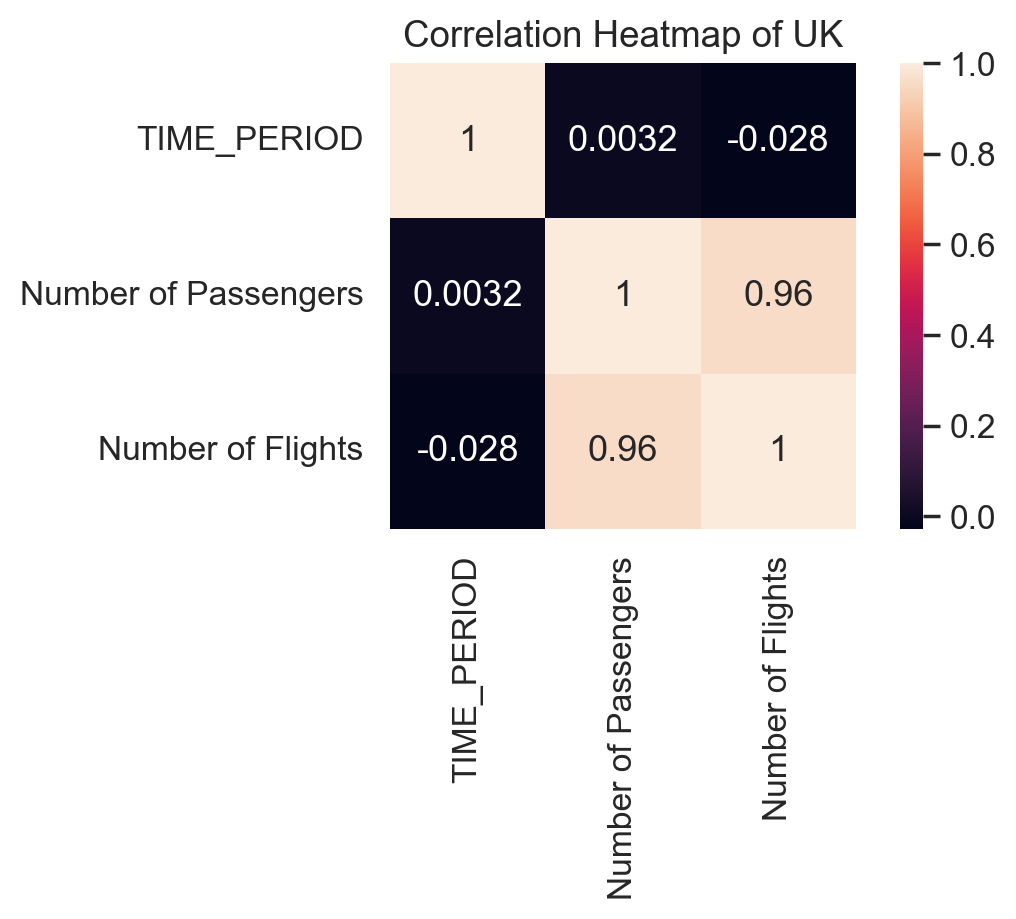

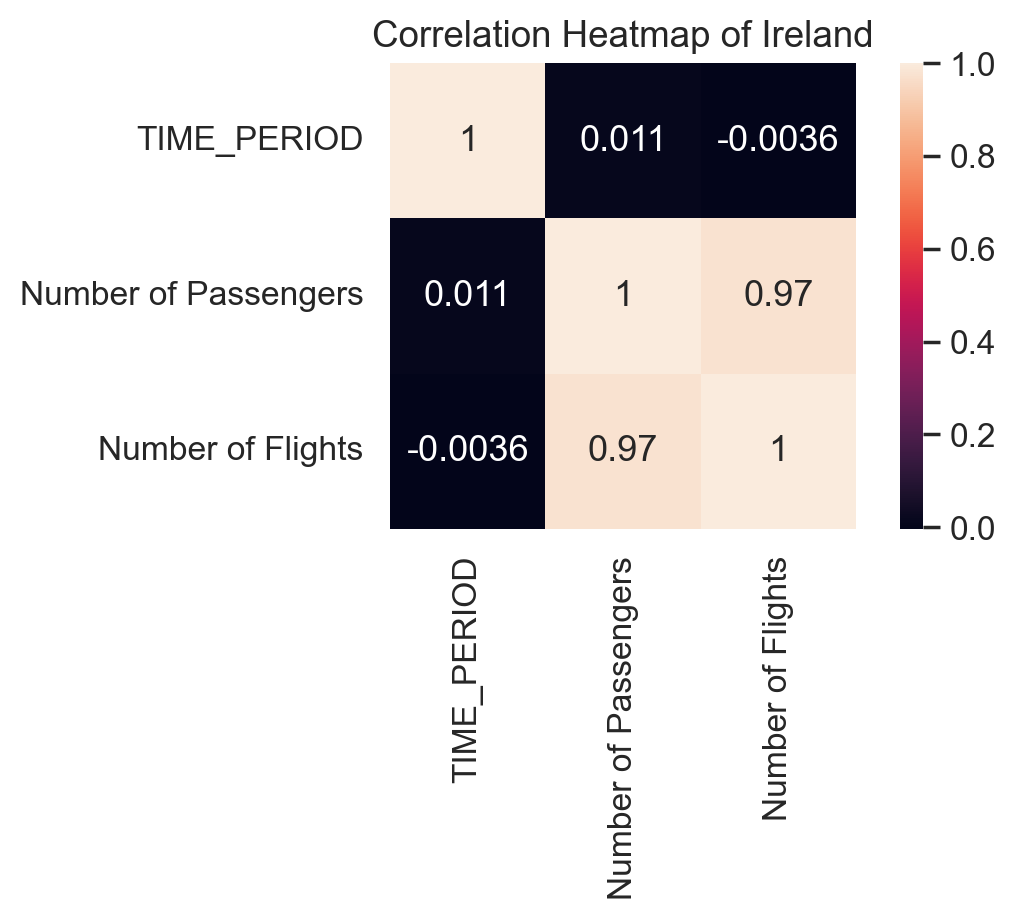

In [45]:
#Separating the UK and Ireland Data
uk_data = transport_data[transport_data['geo'] == 'UK']
ireland_data = transport_data[transport_data['geo'] == 'IE']

#Calculate the correlation for UK data
uk_corr = uk_data.corr()

#Plot the correlation heatmap for UK data
sns.set(font_scale=1.1)
hm_uk = sns.heatmap(uk_corr, cbar=True, annot=True, square=True, annot_kws={'size': 13})
plt.title('Correlation Heatmap of UK')
plt.tight_layout()
plt.show()

#Calculate the correlation for Ireland data
ireland_corr = ireland_data.corr()

#Plot the correlation heatmap for Ireland data
sns.set(font_scale=1.1)
hm_ireland = sns.heatmap(ireland_corr, cbar=True, annot=True, square=True, annot_kws={'size': 13})
plt.title('Correlation Heatmap of Ireland')
plt.tight_layout()
plt.show()


### Findings
- There is a strong positive correlation between number of flights and number of passengers in both UK and Ireland.
- There is a weak negative correlation between time period and number of flights for in UK and Ireland.
- There is a weak positive correlation between time period and number of passengers for in UK and Ireland.

In [46]:
#Separate the transport_data into the transport coverage categories (INTL and NAT)
international_data = transport_data[transport_data['tra_cov'] == 'INTL']
national_data = transport_data[transport_data['tra_cov'] == 'NAT']

### Box Plot for Number of Passengers by Countries by transport coverage

In [47]:
# Box plot for international coverage by year for each country
fig_int = px.box(international_data, x='TIME_PERIOD', y='Number of Passengers', color='geo',
                  category_orders={'geo': ['UK', 'IE']},
                  labels={'geo': 'Countries', 'Number of Passengers': 'Number of Passengers'},
                  title='Box Plot of Number of Passengers for International Coverage for each country ')

fig_int.update_layout(xaxis_title='Year', yaxis_title='Number of Passengers')

#Box plot for national coverage by year for each country
fig_nat = px.box(national_data, x='TIME_PERIOD', y='Number of Passengers', color='geo',
                 category_orders={'geo': ['UK', 'IE']},
                 labels={'geo': 'Countries', 'Number of Passengers': 'Number of Passengers'},
                 title='Box Plot of Number of Passengers for National Coverage for each country')

fig_nat.update_layout(xaxis_title='Year', yaxis_title='Number of Passengers')

# Displaying the plots
fig_int.show()
fig_nat.show()

### Findings
-There is presence of outliers in the both data

### Box Plot for Number of Flights by Countries by transport coverage

In [48]:
# Box plot for international coverage by year for each country
fig_int = px.box(international_data, x='TIME_PERIOD', y='Number of Flights', color='geo',
                  category_orders={'geo': ['UK', 'IE']},
                  labels={'geo': 'Countries', 'Number of Flights': 'Number of Flights'},
                  title='Box Plot of Number of Flights for International Coverage for each country')

fig_int.update_layout(xaxis_title='Year', yaxis_title='Number of Flights')

# Box plot for national coverage by year for each country
fig_nat = px.box(national_data, x='TIME_PERIOD', y='Number of Flights', color='geo',
                 category_orders={'geo': ['UK', 'IE']},
                 labels={'geo': 'Countries', 'Number of Flights': 'Number of Flights'},
                 title='Box Plot of Number of Flights for National Coverage for each country')

fig_nat.update_layout(xaxis_title='Year', yaxis_title='Number of Flights')

# Displaying the plots
fig_int.show()
fig_nat.show()

# STATISTICAL ANALYSIS
Statistics involves the following:-

Performing descriptive statistics and visualisations on the transport_df dataset in order to summarise it.

Analysing the variables in the transport_df dataset and use appropriate inferential statistics to gain insights on population values (e.g., if you were working with public transport, you could find a confidence interval for the population proportion of users commuting to Dublin by train).

Undertaking research to find similarities between Finland and Ireland and apply parametric and non-parametric inferential statistical techniques to compare them (e.g., t-test, analysis of variance, Wilcoxon test, chi-squared test, among others). You must justify your choices and verify the applicability of the tests. Hypotheses and conclusions must be clearly stated. You are expected to use at least 5 different inferential statistics tests.

### Histogram and Density plot for Number of Passengers by Transport Coverage for each country

In [49]:
#Create histograms for International and National coverage separately using Plotly Express
fig_int = px.histogram(international_data, x='Number of Passengers',
                         facet_col='geo', title='Distribution of Number of Passengers (International)')

fig_nat = px.histogram(national_data, x='Number of Passengers',
                        facet_col='geo', title='Distribution of Number of Passengers (National)')

#Update layout for International coverage
fig_int.update_layout(xaxis_title='Number of Passengers', yaxis_title='Frequency')

#Update layout for National coverage
fig_nat.update_layout(xaxis_title='Number of Passengers', yaxis_title='Frequency')

#Show the plots
fig_int.show()
fig_nat.show()

### Findings
- The number of passengers is rightly skewed in both national and international transport coverage for both countries.

### Histogram and Density plot  for Number of Flights by Transport Coverage for each country

In [50]:
#Create histograms for International and National coverage separately using Plotly Express
fig_int = px.histogram(international_data, x='Number of Flights',
                         facet_col='geo', title='Distribution of Number of Flights (International)')

fig_nat = px.histogram(national_data, x='Number of Flights',
                        facet_col='geo', title='Distribution of Numbers of Flights (National)')

# Update layout for International coverage
fig_int.update_layout(xaxis_title='Number of Flights', yaxis_title='Frequency')

# Update layout for National coverage
fig_nat.update_layout(xaxis_title='Number of Flights', yaxis_title='Frequency')

# Show the plots
fig_int.show()
fig_nat.show()

### Findings
- The number of flights variable is rightly skewed for both International and National Coverage in both countries

### Check if the Distributions are Normally distributed

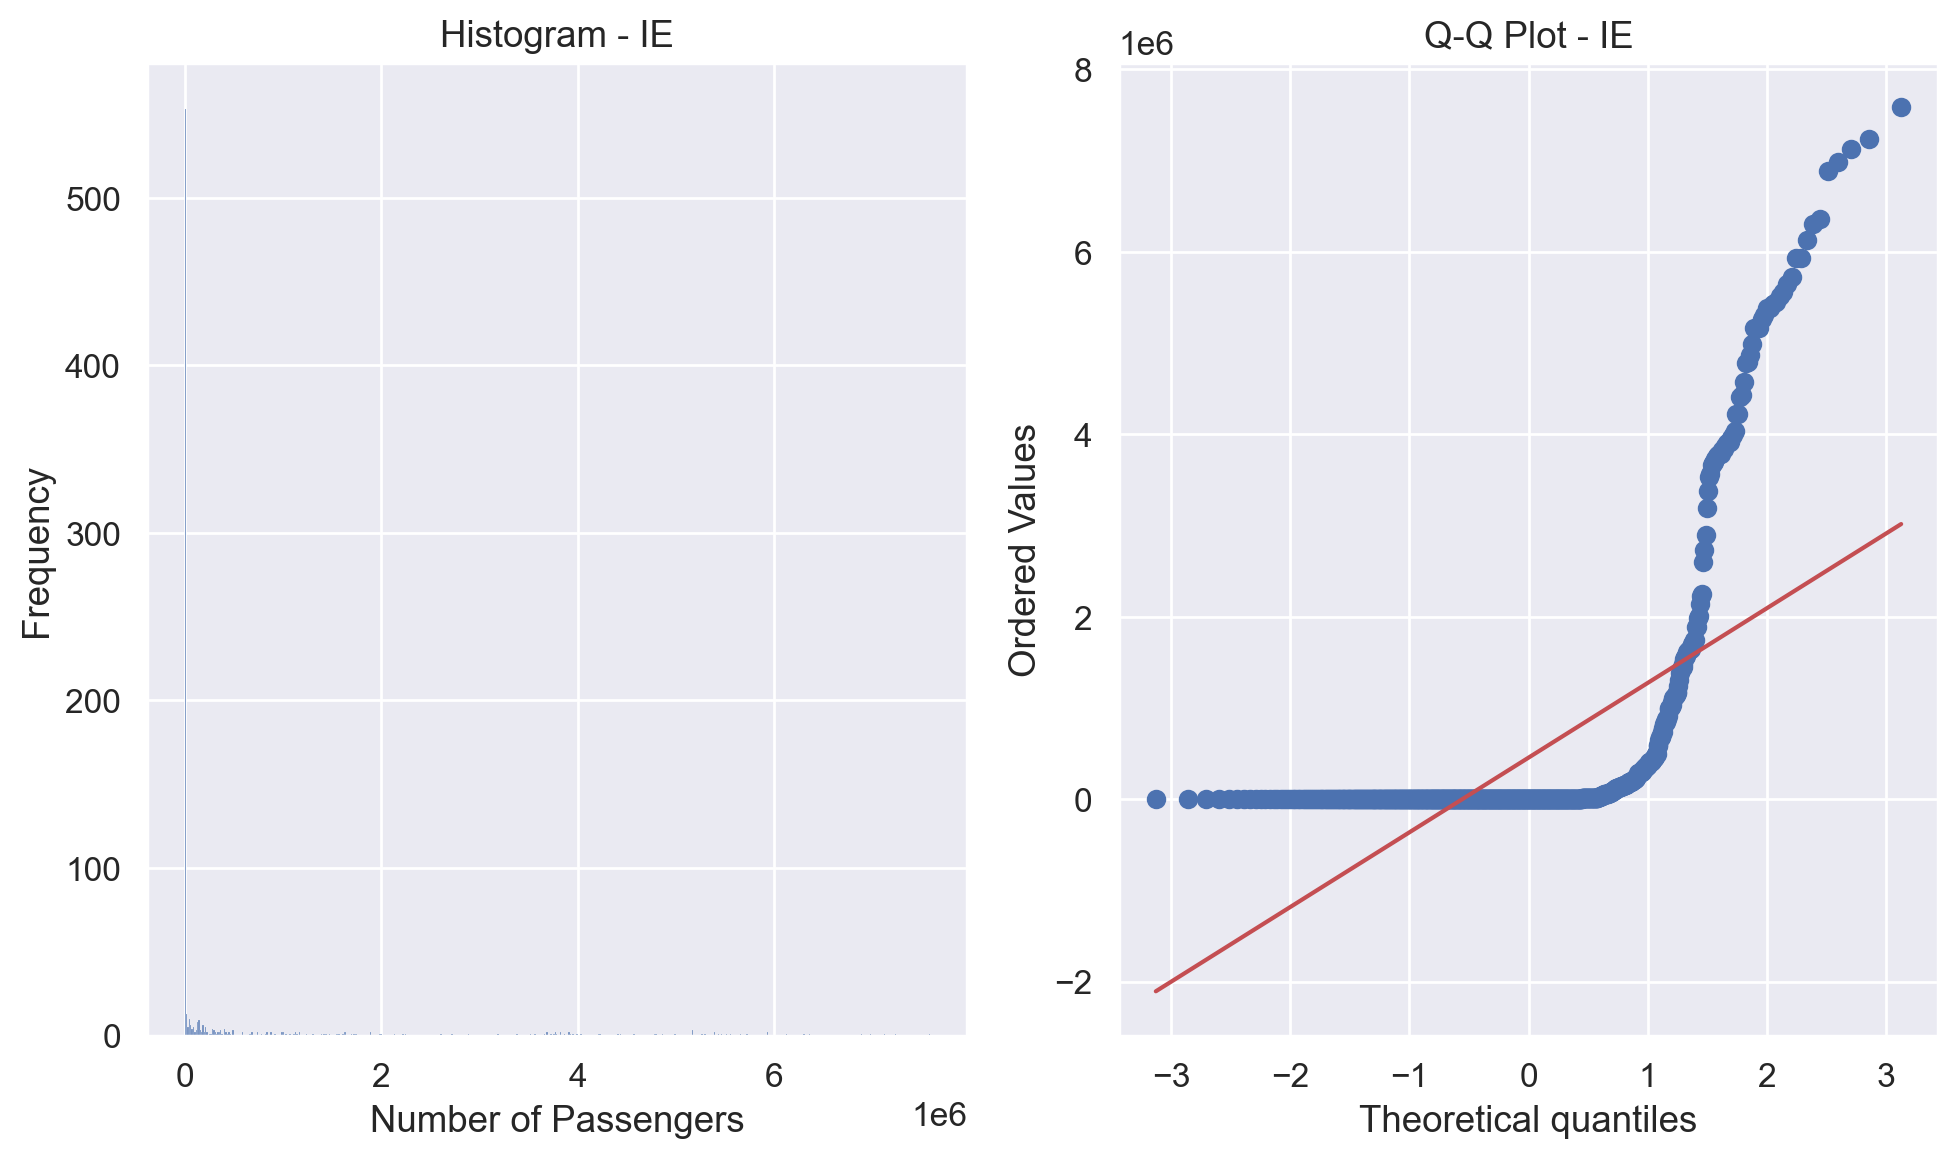

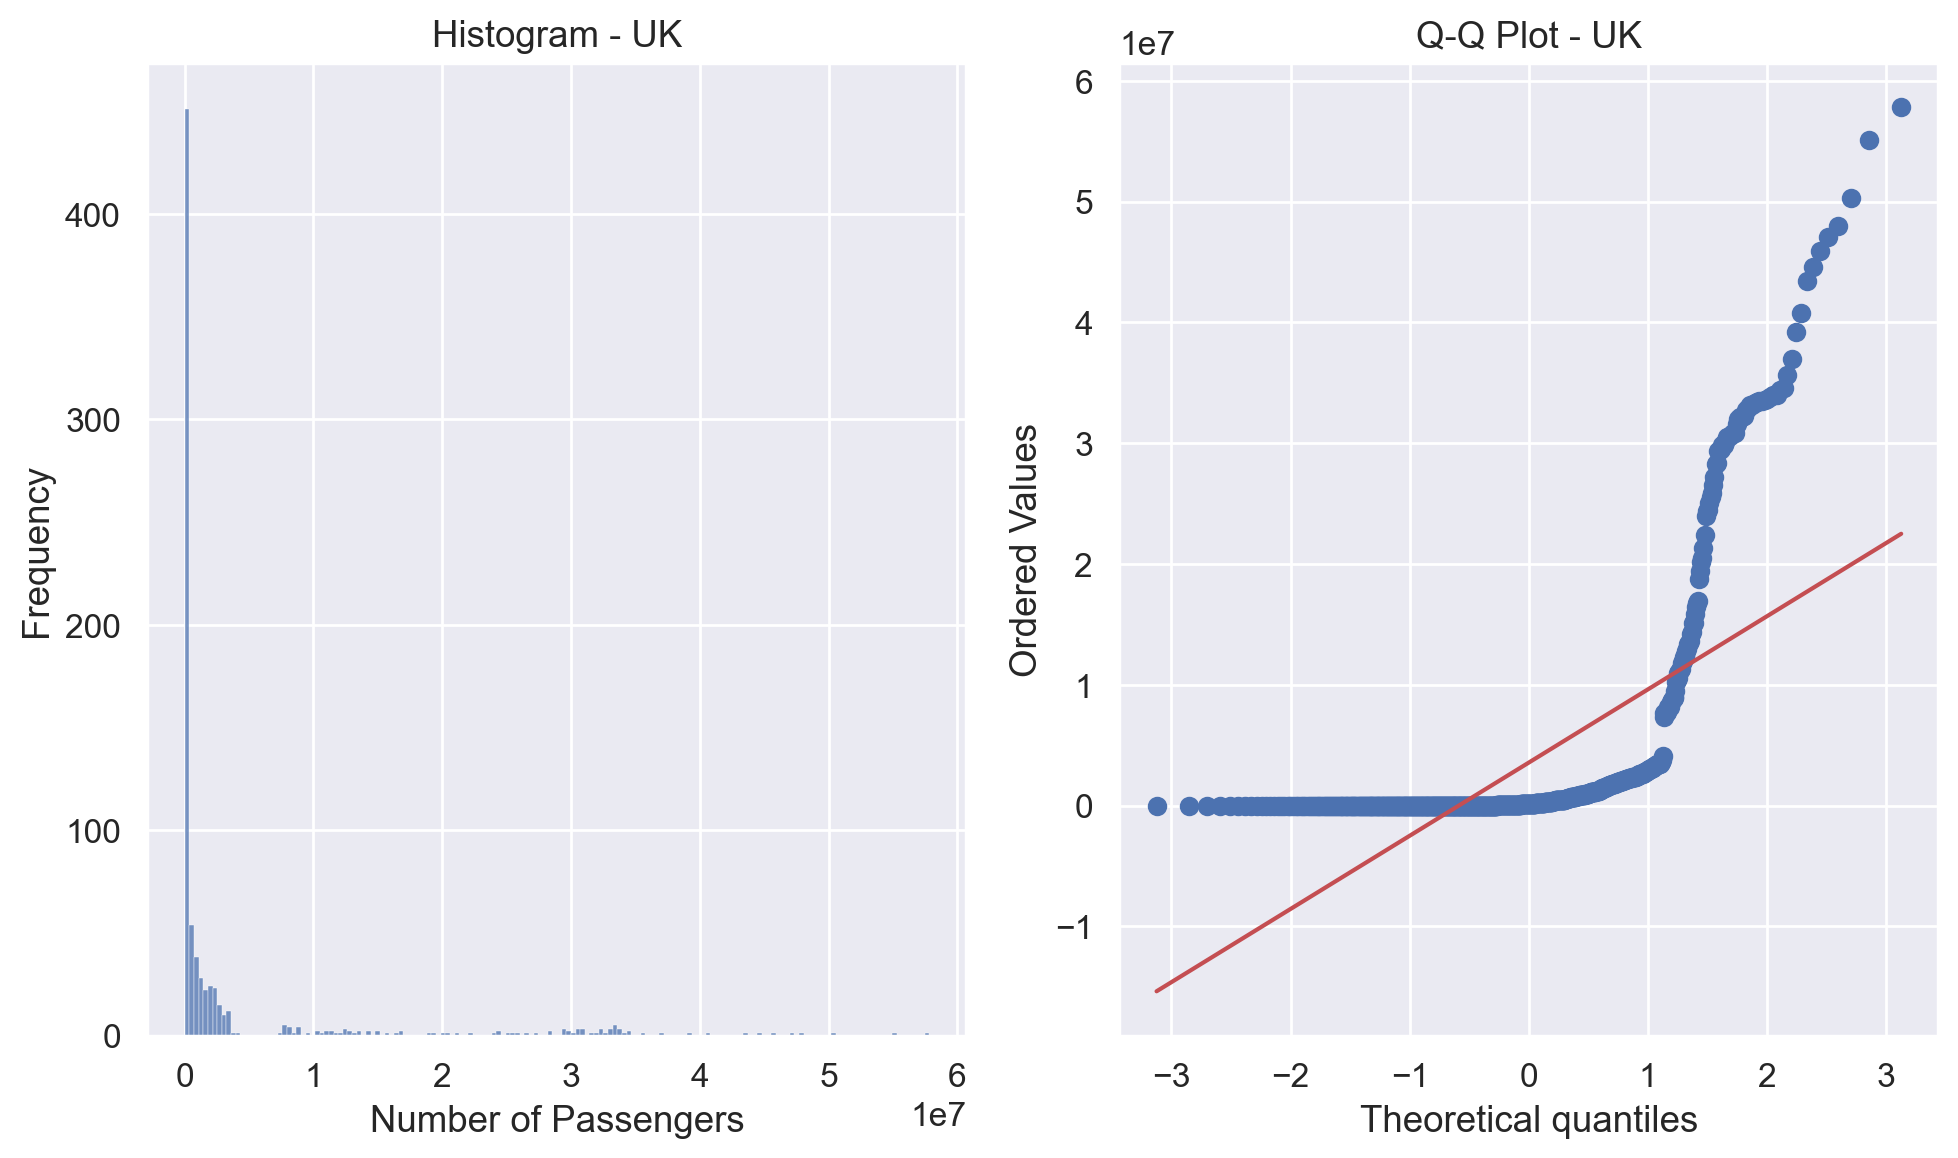

In [51]:
#Check whether number of passengers feature is normal distributed for each country
#using Q-Q plot
import scipy.stats as stat
import pylab
def plot_data(sample, label):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(sample)
    plt.title(f'Histogram - {label}')
    plt.xlabel('Number of Passengers')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    stat.probplot(sample, dist='norm', plot=pylab)
    plt.title(f'Q-Q Plot - {label}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')

    plt.tight_layout()
    plt.show()

for country in transport_data['geo'].unique():
    country_data = transport_data[transport_data['geo'] == country]['Number of Passengers']
    plot_data(country_data, country)

### Findings
- The variable Number of Passengers is not normally distributed for each country

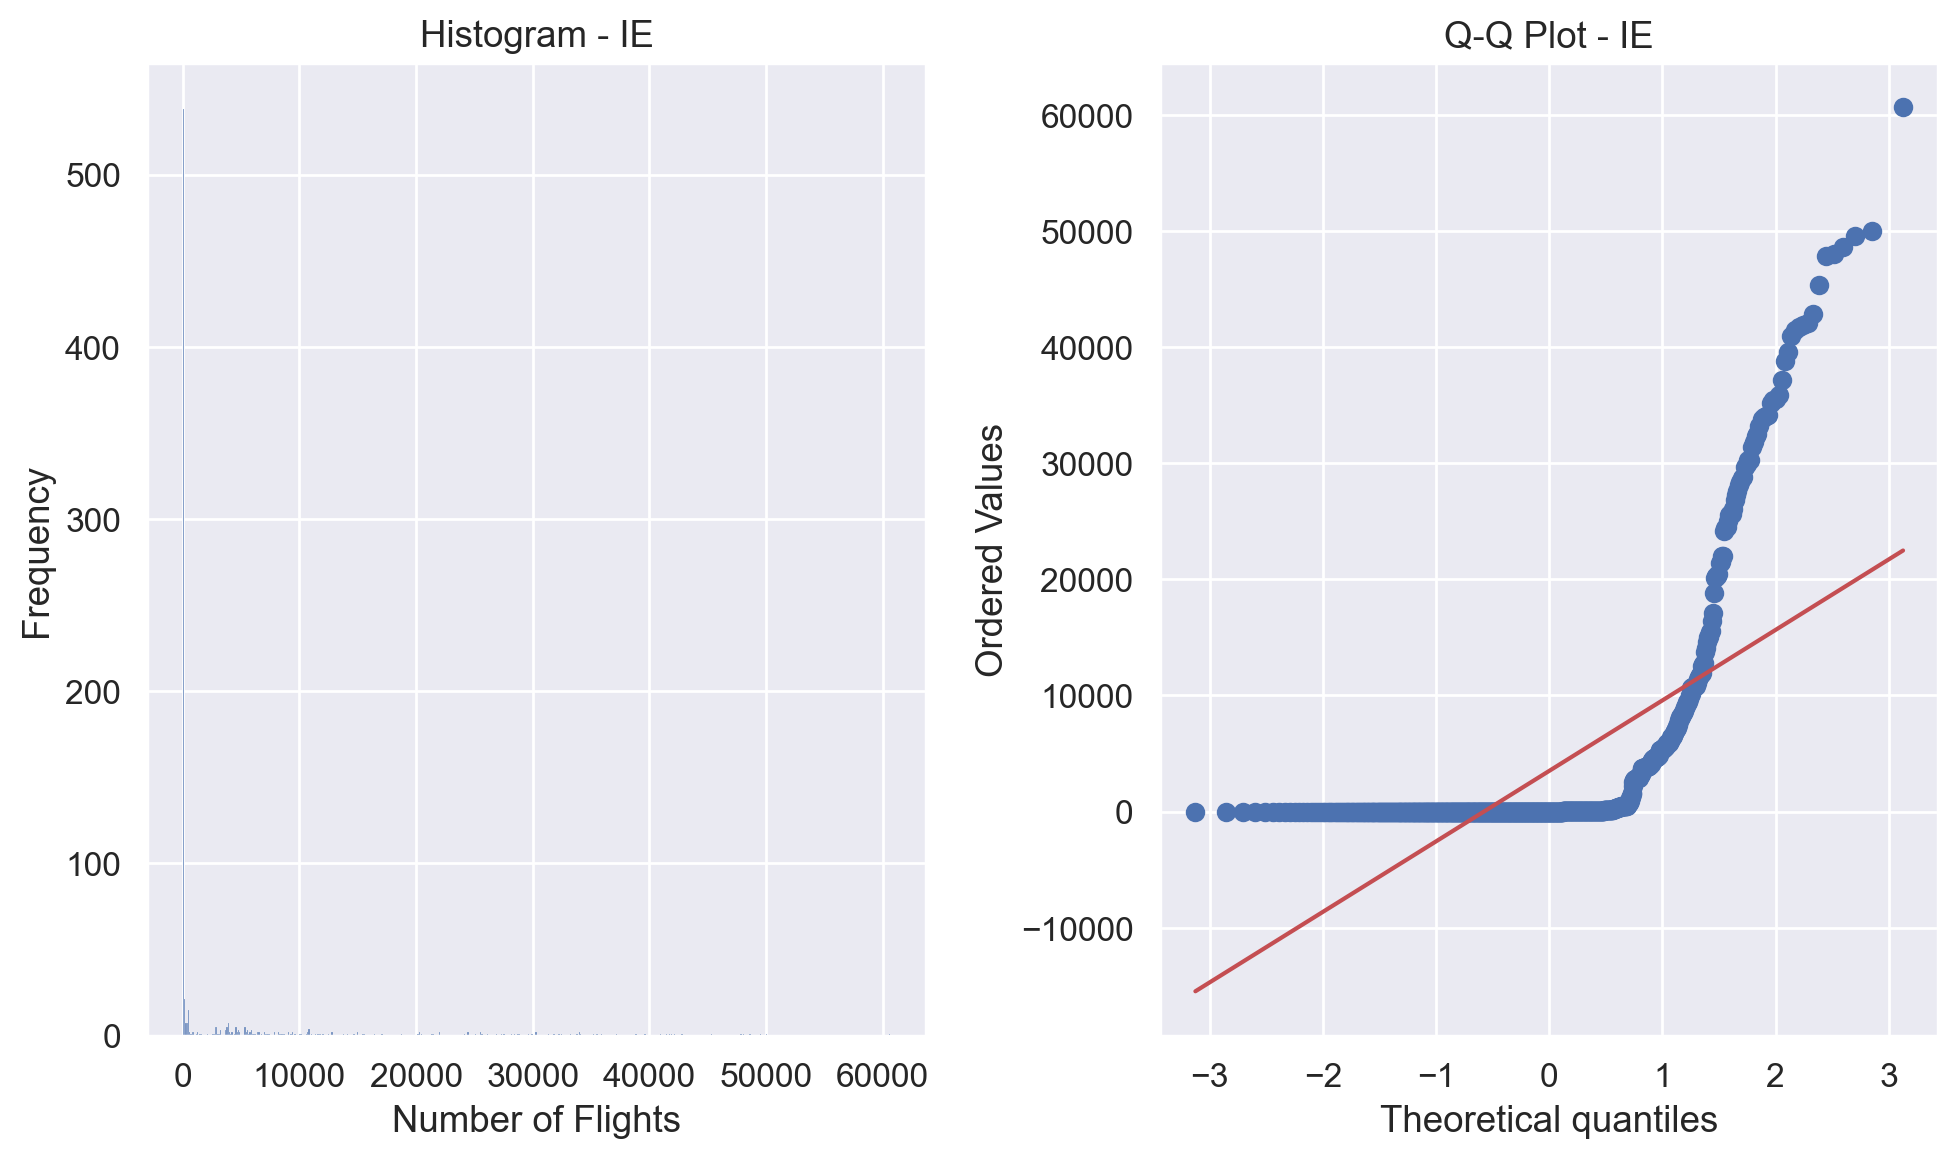

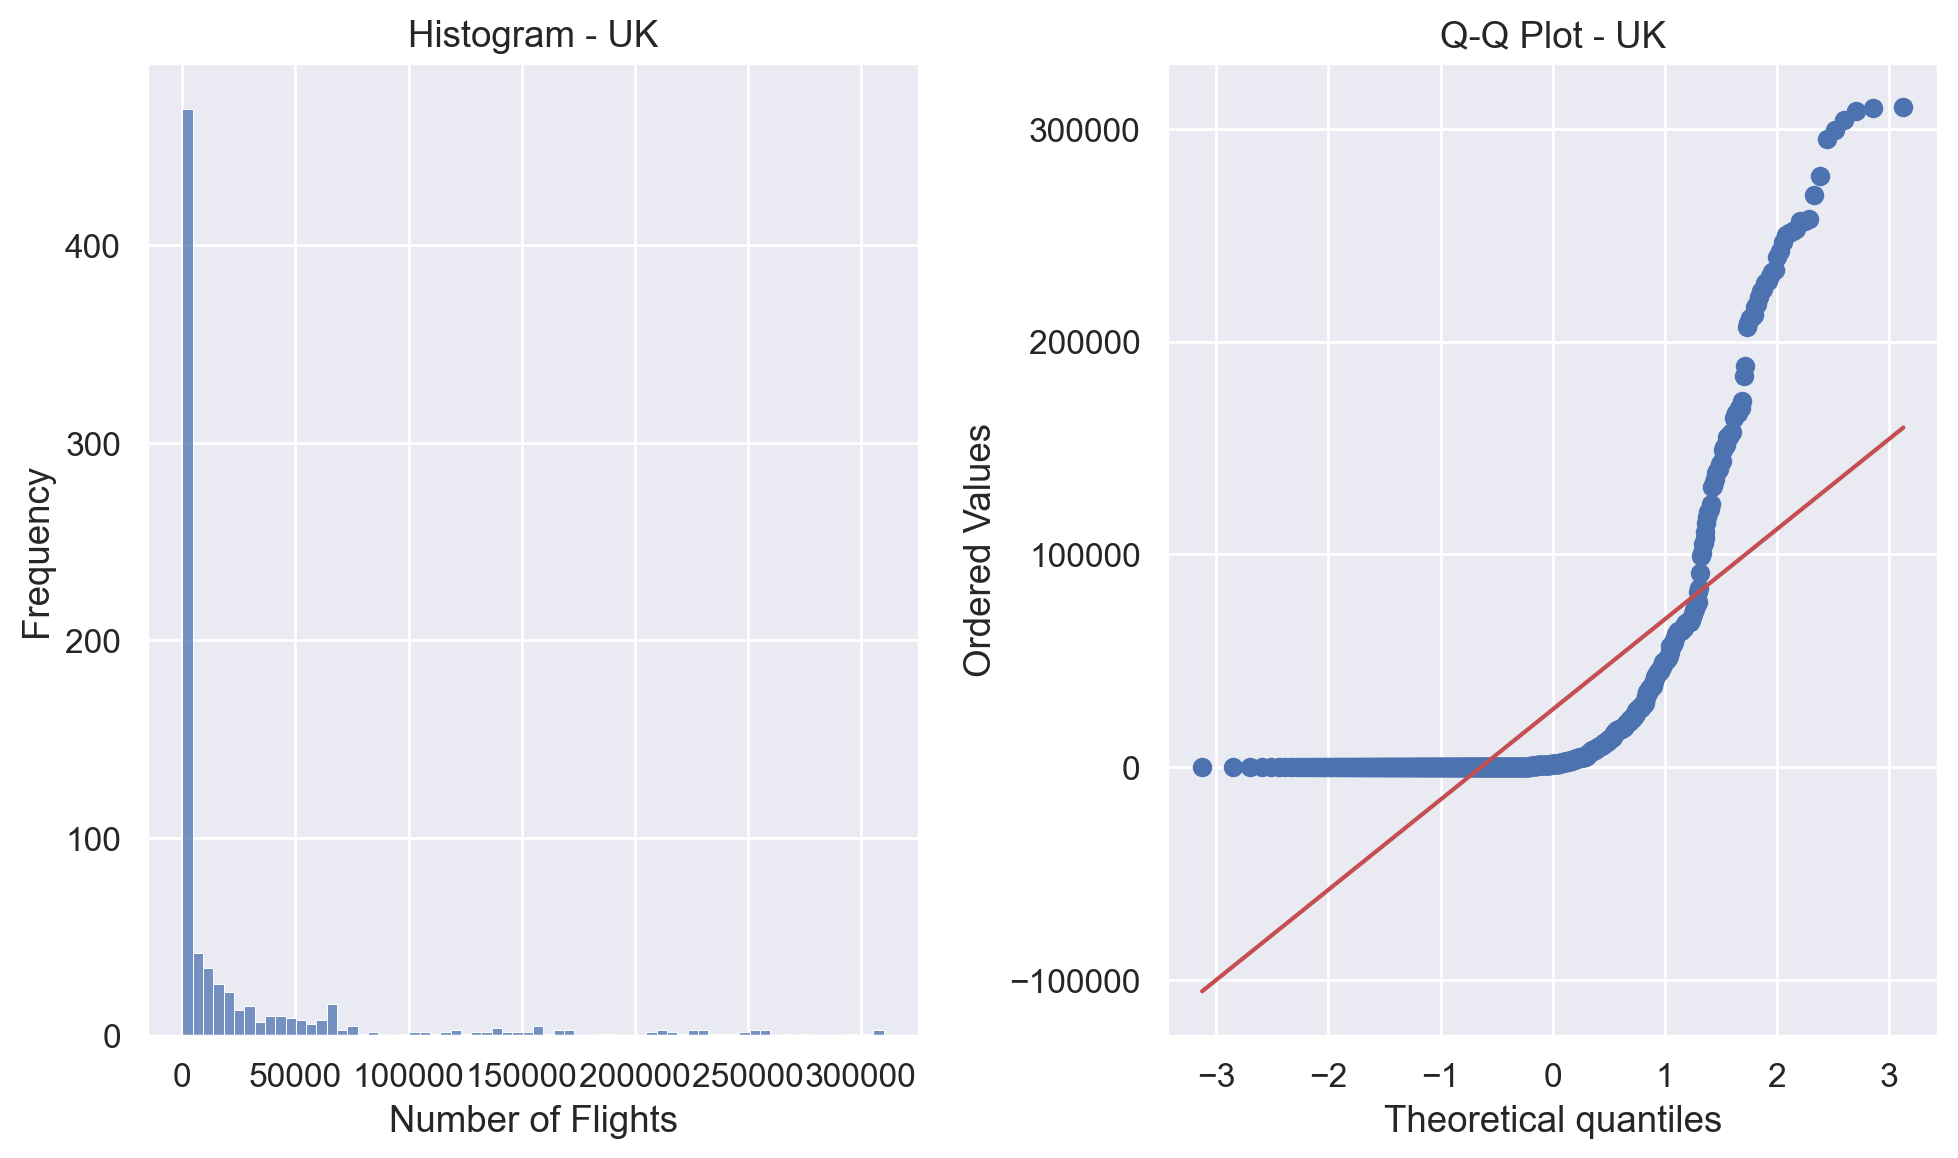

In [52]:
#Plot Q-Q plot to check if Number of Flights is normally distributed
import scipy.stats as stat
import pylab
def plot_data(sample, label):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(sample)
    plt.title(f'Histogram - {label}')
    plt.xlabel('Number of Flights')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    stat.probplot(sample, dist='norm', plot=pylab)
    plt.title(f'Q-Q Plot - {label}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')

    plt.tight_layout()
    plt.show()

for country in transport_data['geo'].unique():
    country_data = transport_data[transport_data['geo'] == country]['Number of Flights']
    plot_data(country_data, country)

### Findings
- The variable number of flights is not normally distributed for both countries

### Descriptive Statistics
- Descriptive statistics of Ireland: Passengers on board and commercial passenger flight.
- Measures of central tendencies for number of passengers 

### Measures of Central Tendency and Dispersion

In [53]:
#Filter data for UK and Ireland
uk_data = transport_data[transport_data['geo'] == 'UK']
ie_data = transport_data[transport_data['geo'] == 'IE']

In [54]:
#Measures of central tendency and dispersion for number of passengers in UK
import statistics
print(statistics.mean(uk_data["Number of Passengers"]))
print(statistics.median(uk_data["Number of Passengers"]))
print(statistics.multimode(uk_data['Number of Passengers']))
print(statistics.variance(uk_data["Number of Passengers"]))
print(statistics.stdev(uk_data["Number of Passengers"]))

3570163.848717949
139672.0
[0]
81891930381091.84
9049416.024312941


In [55]:
#Measures of central tendency and dispersion for number of passengers in IE
import statistics
print(statistics.mean(ie_data["Number of Passengers"]))
print(statistics.median(ie_data["Number of Passengers"]))
print(statistics.multimode(ie_data['Number of Passengers']))
print(statistics.variance(ie_data["Number of Passengers"]))
print(statistics.stdev(ie_data["Number of Passengers"]))

454638.1064102564
311.5
[0]
1638880398770.6858
1280187.6420160779


In [56]:
print(statistics.mean(ie_data["Number of Flights"]))
print(statistics.median(ie_data["Number of Flights"]))
print(statistics.multimode(ie_data['Number of Flights']))
print(statistics.variance(ie_data["Number of Flights"]))
print(statistics.stdev(ie_data["Number of Flights"]))

3507.8025641025642
4.0
[0]
81308458.99049406
9017.120326938864


In [57]:
print(statistics.mean(uk_data["Number of Flights"]))
print(statistics.median(uk_data["Number of Flights"]))
print(statistics.multimode(uk_data['Number of Flights']))
print(statistics.variance(uk_data["Number of Flights"]))
print(statistics.stdev(uk_data["Number of Flights"]))

27100.066666666666
1259.5
[0]
3377993762.34985
58120.51068555618


In [58]:
#interquartiles Ranges for number of passengers in UK
Minimum = uk_data["Number of Passengers"].min()
Q1 = uk_data["Number of Passengers"].quantile(0.25)
Median = uk_data["Number of Passengers"].quantile(0.50)
Q3 = uk_data["Number of Passengers"].quantile(0.75)
Maximum = uk_data["Number of Passengers"].max()
Minimum, Q1, Median, Q3, Maximum

(0, 0.0, 139672.0, 1668302.0, 57817776)

In [59]:
#interquartiles Ranges for number of passengers in IE
Minimum = ie_data["Number of Passengers"].min()
Q1 = ie_data["Number of Passengers"].quantile(0.25)
Median = ie_data["Number of Passengers"].quantile(0.50)
Q3 = ie_data["Number of Passengers"].quantile(0.75)
Maximum = ie_data["Number of Passengers"].max()
Minimum, Q1, Median, Q3, Maximum

(0, 0.0, 311.5, 63760.25, 7587947)

In [60]:
#interquartiles Ranges for number of flights in UK
Minimum = uk_data["Number of Flights"].min()
Q1 = uk_data["Number of Flights"].quantile(0.25)
Median = uk_data["Number of Flights"].quantile(0.50)
Q3 = uk_data["Number of Flights"].quantile(0.75)
Maximum = uk_data["Number of Flights"].max()
Minimum, Q1, Median, Q3, Maximum

(0, 0.0, 1259.5, 21247.5, 310181)

In [61]:
#interquartiles Ranges for number of flights in IE
Minimum = ie_data["Number of Flights"].min()
Q1 = ie_data["Number of Flights"].quantile(0.25)
Median = ie_data["Number of Flights"].quantile(0.50)
Q3 = ie_data["Number of Flights"].quantile(0.75)
Maximum = ie_data["Number of Flights"].max()
Minimum, Q1, Median, Q3, Maximum

(0, 0.0, 4.0, 506.25, 60662)

In [62]:
#Separate national and international data into UK and IE
uk_nat_data = national_data[national_data['geo'] == 'UK']
uk_int_data = international_data[international_data['geo'] == 'UK']
ie_nat_data = national_data[national_data['geo'] == 'IE']
ie_int_data = international_data[international_data['geo'] == 'IE']

## Measures of central tendency and dispersion for National Transport Passengers Ireland

In [63]:
grouped_data = ie_nat_data.groupby('aircraft')['Number of Passengers']

# Calculate statistics
passenger_measures_NAT = {
    'Frequency': grouped_data.sum(),
    'Mean': grouped_data.apply(statistics.mean),
    'Variance': grouped_data.apply(statistics.variance),
    'Std_Deviation': grouped_data.apply(statistics.stdev),
    'Minimum': grouped_data.min(),
    'Q1': grouped_data.quantile(0.25),
    'Median': grouped_data.median(),
    'Q3': grouped_data.quantile(0.75),
    'Maximum': grouped_data.max(),
    'Mode': grouped_data.apply(statistics.mode)
}

# Convert dictionary to DataFrame
passenger_measures_NAT = pd.DataFrame(passenger_measures_NAT).reset_index()
passenger_measures_NAT.columns = ['aircraft', 'Frequency', 'Mean', 'Variance', 'Std_Deviation', 'Minimum', 'Q1', 'Median', 'Q3', 'Maximum', 'Mode']
passenger_measures_NAT = passenger_measures_NAT.style.format({
    'Frequency': '{:.2f}',
    'Mean': '{:.2f}',
    'Variance': '{:.2f}',
    'Std_Deviation': '{:.2f}',
    'Minimum': '{:.2f}',
    'Q1': '{:.2f}',
    'Median': '{:.2f}',
    'Q3': '{:.2f}',
    'Maximum': '{:.2f}',
    'Mode': '{:.2f}'
})

passenger_measures_NAT

## Measures of central tendency and dispersion for National Transport Passengers UK

In [64]:
# Group by 'aircraft'
grouped_data = uk_nat_data.groupby('aircraft')['Number of Passengers']

# Calculate statistics
passenger_measures_NAT = {
    'Frequency': grouped_data.sum(),
    'Mean': grouped_data.apply(statistics.mean),
    'Variance': grouped_data.apply(statistics.variance),
    'Std_Deviation': grouped_data.apply(statistics.stdev),
    'Minimum': grouped_data.min(),
    'Q1': grouped_data.quantile(0.25),
    'Median': grouped_data.median(),
    'Q3': grouped_data.quantile(0.75),
    'Maximum': grouped_data.max(),
    'Mode': grouped_data.apply(statistics.mode)
}

# Convert dictionary to DataFrame
passenger_measures_NAT = pd.DataFrame(passenger_measures_NAT).reset_index()
passenger_measures_NAT.columns = ['aircraft', 'Frequency', 'Mean', 'Variance', 'Std_Deviation', 'Minimum', 'Q1', 'Median', 'Q3', 'Maximum', 'Mode']
passenger_measures_NAT = passenger_measures_NAT.style.format({
    'Frequency': '{:.2f}',
    'Mean': '{:.2f}',
    'Variance': '{:.2f}',
    'Std_Deviation': '{:.2f}',
    'Minimum': '{:.2f}',
    'Q1': '{:.2f}',
    'Median': '{:.2f}',
    'Q3': '{:.2f}',
    'Maximum': '{:.2f}',
    'Mode': '{:.2f}'
})

passenger_measures_NAT

## 2. Measures of central tendency and dispersion for International Transport Passengers Ireland

In [65]:
# Group by 'aircraft'
grouped_data = ie_int_data.groupby('aircraft')['Number of Passengers']

# Calculate statistics
passenger_measures_INT = {
    'Frequency': grouped_data.sum(),
    'Mean': grouped_data.apply(statistics.mean),
    'Variance': grouped_data.apply(statistics.variance),
    'Std_Deviation': grouped_data.apply(statistics.stdev),
    'Minimum': grouped_data.min(),
    'Q1': grouped_data.quantile(0.25),
    'Median': grouped_data.median(),
    'Q3': grouped_data.quantile(0.75),
    'Maximum': grouped_data.max(),
    'Mode': grouped_data.apply(statistics.mode)
}

# Convert dictionary to DataFrame
passenger_measures_INT = pd.DataFrame(passenger_measures_INT).reset_index()
passenger_measures_INT.columns = ['aircraft', 'Frequency', 'Mean', 'Variance', 'Std_Deviation', 'Minimum', 'Q1', 'Median', 'Q3', 'Maximum', 'Mode']
passenger_measures_INT = passenger_measures_INT.style.format({
    'Frequency': '{:.2f}',
    'Mean': '{:.2f}',
    'Variance': '{:.2f}',
    'Std_Deviation': '{:.2f}',
    'Minimum': '{:.2f}',
    'Q1': '{:.2f}',
    'Median': '{:.2f}',
    'Q3': '{:.2f}',
    'Maximum': '{:.2f}',
    'Mode': '{:.2f}'
})

passenger_measures_INT

## 2. Measures of central tendency and dispersion for International Transport Passengers UK

In [66]:
# Group by 'aircraft'
grouped_data = uk_int_data.groupby('aircraft')['Number of Passengers']

# Calculate statistics
passenger_measures_INT = {
    'Frequency': grouped_data.sum(),
    'Mean': grouped_data.apply(statistics.mean),
    'Variance': grouped_data.apply(statistics.variance),
    'Std_Deviation': grouped_data.apply(statistics.stdev),
    'Minimum': grouped_data.min(),
    'Q1': grouped_data.quantile(0.25),
    'Median': grouped_data.median(),
    'Q3': grouped_data.quantile(0.75),
    'Maximum': grouped_data.max(),
    'Mode': grouped_data.apply(statistics.mode)
}

# Convert dictionary to DataFrame
passenger_measures_INT = pd.DataFrame(passenger_measures_INT).reset_index()
passenger_measures_INT.columns = ['aircraft', 'Frequency', 'Mean', 'Variance', 'Std_Deviation', 'Minimum', 'Q1', 'Median', 'Q3', 'Maximum', 'Mode']
passenger_measures_INT = passenger_measures_INT.style.format({
    'Frequency': '{:.2f}',
    'Mean': '{:.2f}',
    'Variance': '{:.2f}',
    'Std_Deviation': '{:.2f}',
    'Minimum': '{:.2f}',
    'Q1': '{:.2f}',
    'Median': '{:.2f}',
    'Q3': '{:.2f}',
    'Maximum': '{:.2f}',
    'Mode': '{:.2f}'
})

passenger_measures_INT

## Measures of central tendency and dispersion for International Transport Flights Ireland

In [67]:
# Group by 'aircraft'
grouped_data = ie_int_data.groupby('aircraft')['Number of Flights']

# Calculate statistics
flight_measures_INT = {
    'Frequency': grouped_data.sum(),
    'Mean': grouped_data.apply(statistics.mean),
    'Variance': grouped_data.apply(statistics.variance),
    'Std_Deviation': grouped_data.apply(statistics.stdev),
    'Minimum': grouped_data.min(),
    'Q1': grouped_data.quantile(0.25),
    'Median': grouped_data.median(),
    'Q3': grouped_data.quantile(0.75),
    'Maximum': grouped_data.max(),
    'Mode': grouped_data.apply(statistics.mode)
}

# Convert dictionary to DataFrame
flight_measures_INT = pd.DataFrame(flight_measures_INT).reset_index()
flight_measures_INT.columns = ['aircraft', 'Frequency', 'Mean', 'Variance', 'Std_Deviation', 'Minimum', 'Q1', 'Median', 'Q3', 'Maximum', 'Mode']
flight_measures_INT = flight_measures_INT.style.format({
    'Frequency': '{:.2f}',
    'Mean': '{:.2f}',
    'Variance': '{:.2f}',
    'Std_Deviation': '{:.2f}',
    'Minimum': '{:.2f}',
    'Q1': '{:.2f}',
    'Median': '{:.2f}',
    'Q3': '{:.2f}',
    'Maximum': '{:.2f}',
    'Mode': '{:.2f}'
})

flight_measures_INT

## Measures of central tendency and dispersion for International Transport Flights UK

In [68]:
# Group by 'aircraft'
grouped_data = uk_int_data.groupby('aircraft')['Number of Flights']

# Calculate statistics
flight_measures_INT = {
    'Frequency': grouped_data.sum(),
    'Mean': grouped_data.apply(statistics.mean),
    'Variance': grouped_data.apply(statistics.variance),
    'Std_Deviation': grouped_data.apply(statistics.stdev),
    'Minimum': grouped_data.min(),
    'Q1': grouped_data.quantile(0.25),
    'Median': grouped_data.median(),
    'Q3': grouped_data.quantile(0.75),
    'Maximum': grouped_data.max(),
    'Mode': grouped_data.apply(statistics.mode)
}

# Convert dictionary to DataFrame
flight_measures_INT = pd.DataFrame(flight_measures_INT).reset_index()
flight_measures_INT.columns = ['aircraft', 'Frequency', 'Mean', 'Variance', 'Std_Deviation', 'Minimum', 'Q1', 'Median', 'Q3', 'Maximum', 'Mode']
flight_measures_INT = flight_measures_INT.style.format({
    'Frequency': '{:.2f}',
    'Mean': '{:.2f}',
    'Variance': '{:.2f}',
    'Std_Deviation': '{:.2f}',
    'Minimum': '{:.2f}',
    'Q1': '{:.2f}',
    'Median': '{:.2f}',
    'Q3': '{:.2f}',
    'Maximum': '{:.2f}',
    'Mode': '{:.2f}'
})

flight_measures_INT

## Measures of central tendency and dispersion for National Transport Flights Ireland

In [69]:
# Group by 'aircraft'
grouped_data = ie_nat_data.groupby('aircraft')['Number of Flights']

# Calculate statistics
flight_measures_NAT = {
    'Frequency': grouped_data.sum(),
    'Mean': grouped_data.apply(statistics.mean),
    'Variance': grouped_data.apply(statistics.variance),
    'Std_Deviation': grouped_data.apply(statistics.stdev),
    'Minimum': grouped_data.min(),
    'Q1': grouped_data.quantile(0.25),
    'Median': grouped_data.median(),
    'Q3': grouped_data.quantile(0.75),
    'Maximum': grouped_data.max(),
    'Mode': grouped_data.apply(statistics.mode)
}

# Convert dictionary to DataFrame
flight_measures_NAT = pd.DataFrame(flight_measures_NAT).reset_index()
flight_measures_NAT.columns = ['aircraft', 'Frequency', 'Mean', 'Variance', 'Std_Deviation', 'Minimum', 'Q1', 'Median', 'Q3', 'Maximum', 'Mode']
flight_measures_NAT = flight_measures_NAT.style.format({
    'Frequency': '{:.2f}',
    'Mean': '{:.2f}',
    'Variance': '{:.2f}',
    'Std_Deviation': '{:.2f}',
    'Minimum': '{:.2f}',
    'Q1': '{:.2f}',
    'Median': '{:.2f}',
    'Q3': '{:.2f}',
    'Maximum': '{:.2f}',
    'Mode': '{:.2f}'
})

flight_measures_NAT

## Measures of central tendency and dispersion for National Transport Flights UK

In [70]:
# Group by 'aircraft'
grouped_data = uk_nat_data.groupby('aircraft')['Number of Flights']

# Calculate statistics
flight_measures_NAT = {
    'Frequency': grouped_data.sum(),
    'Mean': grouped_data.apply(statistics.mean),
    'Variance': grouped_data.apply(statistics.variance),
    'Std_Deviation': grouped_data.apply(statistics.stdev),
    'Minimum': grouped_data.min(),
    'Q1': grouped_data.quantile(0.25),
    'Median': grouped_data.median(),
    'Q3': grouped_data.quantile(0.75),
    'Maximum': grouped_data.max(),
    'Mode': grouped_data.apply(statistics.mode)
}

# Convert dictionary to DataFrame
flight_measures_NAT = pd.DataFrame(flight_measures_NAT).reset_index()
flight_measures_NAT.columns = ['aircraft', 'Frequency', 'Mean', 'Variance', 'Std_Deviation', 'Minimum', 'Q1', 'Median', 'Q3', 'Maximum', 'Mode']
flight_measures_NAT = flight_measures_NAT.style.format({
    'Frequency': '{:.2f}',
    'Mean': '{:.2f}',
    'Variance': '{:.2f}',
    'Std_Deviation': '{:.2f}',
    'Minimum': '{:.2f}',
    'Q1': '{:.2f}',
    'Median': '{:.2f}',
    'Q3': '{:.2f}',
    'Maximum': '{:.2f}',
    'Mode': '{:.2f}'
})

flight_measures_NAT

## Inferential Statistics about the Number of Passengers
- Sampling
- hypothesis testing
- confidence interval

### SAMPLING

### Simple Random Sampling

In [71]:
#Using Random Sampling to obtain a sample of 200
df=transport_data.groupby('tra_cov', group_keys=False).apply(lambda x: x.sample(200))
df

tra_cov aircraft     distance geo  TIME_PERIOD  Number of Passengers  \
247     INTL    AC_NJ    KM500-999  UK         2008              25050995   
359     INTL    AC_RJ  KM1500-1999  UK         2016                498431   
481     INTL    AC_RT  KM1000-1499  UK         2008                 29905   
416     INTL    AC_RJ    KM_GE2000  IE         2008                  3489   
605     INTL    AC_RT     KM_LT300  IE         2015                254550   
...      ...      ...          ...  ..          ...                   ...   
1542     NAT    AC_WJ     KM_LT300  IE         2016                     0   
1086     NAT    AC_NJ     KM_LT300  UK         2015               3226409   
879      NAT    AC_JJ    KM500-999  UK         2016                    57   
1354     NAT    AC_RT    KM_GE2000  IE         2010                     0   
922      NAT    AC_JJ     KM_LT300  IE         2020                     0   

      Number of Flights  
247              220746  
359                6197  
481                 588  
416                 198  
605                5314  
...                 ...  
1542                  0  
1086              27608  
879                   2  
1354                  0  
922                   0  

[400 rows x 7 columns]

In [72]:
#View the sample dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 247 to 922
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tra_cov               400 non-null    object
 1   aircraft              400 non-null    object
 2   distance              400 non-null    object
 3   geo                   400 non-null    object
 4   TIME_PERIOD           400 non-null    int64 
 5   Number of Passengers  400 non-null    int64 
 6   Number of Flights     400 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 25.0+ KB


## sample mean for UK and Ireland

In [73]:
#Compute the sample distribution mean for each country
#Extract the unique countries
unique_countries = df['geo'].unique()

for country in unique_countries:
    country_data = df[df['geo'] == country]['Number of Passengers']
    
    #Computing sample mean for each country
    country_mean = country_data.mean()
    
    #Print the sample mean for each country
    print(f"Sample mean for {country}: {country_mean}")

Sample mean for UK: 3411960.7461139895
Sample mean for IE: 388535.72463768115


## Frequency of each transport coverage for UK and Ireland

In [74]:
#Group the data by country and compute the value counts of 'tra_cov' for each country
proportion_data = df.groupby('geo')['tra_cov'].value_counts()

#Print proportion_data
print(proportion_data)

geo  tra_cov
IE   INTL       108
     NAT         99
UK   NAT        101
     INTL        92
Name: tra_cov, dtype: int64


## Calculate the proportion of travel coverage = NAT 

In [75]:
#Extract the unique countries
unique_countries = df['geo'].unique()

for country in unique_countries:
    country_data = df[df['geo'] == country]

    #Count the 'NAT' values for travel coverage for each country
    country_nat_count = country_data[country_data['tra_cov'] == 'NAT'].shape[0]

    #Compute the proportion of 'NAT' travel coverage for each country
    total_entries = len(country_data)
    proportion_nat = country_nat_count / total_entries

    #Print the proportion for each country
    print(f"Proportion of 'NAT' travel coverage for {country}: {proportion_nat}")

Proportion of 'NAT' travel coverage for UK: 0.5233160621761658
Proportion of 'NAT' travel coverage for IE: 0.4782608695652174


## Check if the sample is normally distributed for UK and Ireland

In [76]:
#Check if the sample data is normally distributed using kolmogrov test
from scipy.stats import kstest

#Extract the unique countries
unique_countries = df['geo'].unique()

for country in unique_countries:
    country_data = df[df['geo'] == country]['Number of Passengers']
    
    #Kolmogorov-Smirnov test for normality
    normality_test = kstest(country_data, 'norm')
    
    #Print the test result for each country
    print(f"\n Kolmogorov-Smirnov Test for Normality for Number of Passengers in UK {country}:")
    print(f"Statistic: {normality_test.statistic}, p-value: {normality_test.pvalue}")
    
    # Interpretation
    if normality_test.pvalue < 0.05:
        print("Reject the Null Hypothesis: The data follows a normal distribution, and conclude the data doesnt follow a normal distribution.")
    else:
        print("Accept the Null Hypothesis: The data follow a normal distribution, and conclude the data follows a normal distribution")



 Kolmogorov-Smirnov Test for Normality for Number of Passengers in UK UK:
Statistic: 0.7150259067357513, p-value: 2.693655293485367e-100
Reject the Null Hypothesis: The data follows a normal distribution, and conclude the data doesnt follow a normal distribution.

 Kolmogorov-Smirnov Test for Normality for Number of Passengers in UK IE:
Statistic: 0.5748792260665524, p-value: 2.495784222202999e-65
Reject the Null Hypothesis: The data follows a normal distribution, and conclude the data doesnt follow a normal distribution.


## Wilcoxon-Rank-sum Test

In [77]:
from scipy.stats import ranksums

#Extract data for UK and Ireland
uk_data = df[df['geo'] == 'UK']['Number of Passengers']
ireland_data = df[df['geo'] == 'IE']['Number of Passengers']

#Perform Wilcoxon rank-sum test
statistic, p_value = ranksums(uk_data, ireland_data)

#Print the results
print(f"Wilcoxon Rank-Sum Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

#Interpretation of the p-value and making conclusions about the hypothesis
#significance level
alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis and conclude UK and Ireland are not drawn from the same distribution.)")
else:
    print("Fail to reject the null hypothesis and conclude  UK and Ireland are drawn from the same distributions.")


Wilcoxon Rank-Sum Test:
Statistic: 5.608711797312713
P-value: 2.0383813786188952e-08
Reject the null hypothesis and conclude UK and Ireland are not drawn from the same distribution.)


## Kruswallis Test

In [78]:
from scipy.stats import stats

#Extract data for UK and Ireland
uk_data = df[df['geo'] == 'UK']['Number of Passengers']
ireland_data = df[df['geo'] == 'IE']['Number of Passengers']

#Perform the Kruswallis Test
statistic, p_value = stats.kruskal(uk_data, ireland_data)

#Print the results
print(f"Kruswallis Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

#Interpretation of the p-value and making conclusions about the hypothesis
#significance level
alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis and conclude the median is not equal for UK and Ireland)")
else:
    print("Fail to reject the null hypothesis, and conclude the median is the same for Uk and Ireland")

Kruswallis Test:
Statistic: 32.93088737044233
P-value: 9.549394894323993e-09
Reject the null hypothesis and conclude the median is not equal for UK and Ireland)


# Pearson Correlation

In [79]:
from scipy.stats import pearsonr

#Group the data by 'travel coverage' and calculate Pearson correlation and p-values for each group
grouped = df.groupby('tra_cov')[['Number of Flights', 'Number of Passengers']]
correlation_by_coverage = grouped.apply(lambda x: pearsonr(x['Number of Flights'], x['Number of Passengers']))

#Extract the correlation coefficients and p-values into separate columns
correlation_by_coverage = pd.DataFrame(correlation_by_coverage.tolist(), columns=['correlation', 'p-value'], index=correlation_by_coverage.index)

#Calculate confidence intervals for correlation coefficients
n = len(grouped)

#Z-value for 95% confidence interval
z = 1.96 

#Calculate confidence intervals for correlation coefficients
correlation_by_coverage['CI_low'] = 0.5 * np.log((1 + correlation_by_coverage['correlation']) / (1 - correlation_by_coverage['correlation'])) - (z / np.sqrt(n - 3))
correlation_by_coverage['CI_high'] = 0.5 * np.log((1 + correlation_by_coverage['correlation']) / (1 - correlation_by_coverage['correlation'])) + (z / np.sqrt(n - 3))
correlation_by_coverage['CI_low'] = np.tanh(correlation_by_coverage['CI_low'])
correlation_by_coverage['CI_high'] = np.tanh(correlation_by_coverage['CI_high'])

#Print the correlation, p-value, and confidence interval for each 'travel coverage' category
print("Correlation, p-value, and confidence interval for each travel coverage category")
print(correlation_by_coverage)


Correlation, p-value, and confidence interval for each travel coverage category
         correlation        p-value  CI_low  CI_high
tra_cov                                             
INTL        0.967668  2.099581e-120     NaN      NaN
NAT         0.853898   4.596512e-58     NaN      NaN


# Linear Regression

In [80]:
uk_data = transport_data[transport_data['geo'] == 'UK']
ie_data = transport_data[transport_data['geo'] == 'IE']

## Linear Regression of Number of passengers and Number of Flights in UK

In [81]:
import statsmodels.api as sm


# Define dependent variable (y) and independent variable (x)
y = uk_data['Number of Passengers']
x = uk_data['Number of Flights']

# Add a constant term for intercept
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Get the regression summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Number of Passengers   R-squared:                       0.920
Model:                              OLS   Adj. R-squared:                  0.920
Method:                   Least Squares   F-statistic:                     8962.
Date:                  Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                          12:42:58   Log-Likelihood:                -12615.
No. Observations:                   780   AIC:                         2.523e+04
Df Residuals:                       778   BIC:                         2.524e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

### Findings
a single increase in number of flights causes a 149.3532 increase in number of passengers.

## Linear Regression of Number of passengers and Number of Flights in IE

In [82]:
import statsmodels.api as sm


# Define dependent variable (y) and independent variable (x)
y = ie_data['Number of Passengers']
x = ie_data['Number of Flights']

# Add a constant term for intercept
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Get the regression summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Number of Passengers   R-squared:                       0.948
Model:                              OLS   Adj. R-squared:                  0.948
Method:                   Least Squares   F-statistic:                 1.425e+04
Date:                  Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                          12:42:58   Log-Likelihood:                -10920.
No. Observations:                   780   AIC:                         2.184e+04
Df Residuals:                       778   BIC:                         2.185e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

### Findings
- a single increase in number of flights causes a 149.3532 increase in number of passengers.

## Linear Regression of Number of passengers and Time period in Ireland

In [83]:
import statsmodels.api as sm

# Define dependent variable (y) and independent variable (x)
y = ie_data['Number of Passengers']
x = ie_data['TIME_PERIOD']

# Add a constant term for intercept
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Get the regression summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Number of Passengers   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                   0.09918
Date:                  Sat, 06 Jan 2024   Prob (F-statistic):              0.753
Time:                          12:42:59   Log-Likelihood:                -12075.
No. Observations:                   780   AIC:                         2.415e+04
Df Residuals:                       778   BIC:                         2.416e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -7.32e+06   2.47e

### Linear Regression of Number of passengers and Time period in UK

In [84]:
import statsmodels.api as sm

# Define dependent variable (y) and independent variable (x)
y = uk_data['Number of Passengers']
x = uk_data['TIME_PERIOD']

# Add a constant term for intercept
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Get the regression summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Number of Passengers   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                  0.007755
Date:                  Sat, 06 Jan 2024   Prob (F-statistic):              0.930
Time:                          12:42:59   Log-Likelihood:                -13600.
No. Observations:                   780   AIC:                         2.720e+04
Df Residuals:                       778   BIC:                         2.721e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.18e+07   1.75e

# linear Regression For Each Categorical Variable in Ireland Data

In [85]:
import statsmodels.api as sm

categorical_columns = ['distance', 'aircraft', 'tra_cov']
target_variable = 'Number of Passengers'

# Apply one-hot encoding to each categorical column
encoded_data = pd.get_dummies(ie_data, columns=categorical_columns, drop_first=True)

# Separate predictor variables (X) and target variable (y)
X = encoded_data.drop(["Number of Passengers", "Number of Flights", "geo", "TIME_PERIOD"], axis=1)
y = encoded_data["Number of Passengers"]

# Perform linear regression for each categorical variable
for column in categorical_columns:
    # Extract the columns related to the current categorical variable
    relevant_columns = [col for col in X.columns if col.startswith(column)]
    X_subset = X[relevant_columns]
    
    # Add a constant term for intercept
    X_subset = sm.add_constant(X_subset)
    
    # Fit a linear regression model for the current categorical variable
    model = sm.OLS(y, X_subset).fit()
    
    # Print regression coefficients for each categorical variable
    print(f"Regression coefficients for {column}:")
    print(model.summary())


Regression coefficients for distance:
                             OLS Regression Results                             
Dep. Variable:     Number of Passengers   R-squared:                       0.015
Model:                              OLS   Adj. R-squared:                  0.009
Method:                   Least Squares   F-statistic:                     2.367
Date:                  Sat, 06 Jan 2024   Prob (F-statistic):             0.0381
Time:                          12:42:59   Log-Likelihood:                -12069.
No. Observations:                   780   AIC:                         2.415e+04
Df Residuals:                       774   BIC:                         2.418e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

# linear Regression For Each Categorical Variable in UK Data

In [86]:
import statsmodels.api as sm

categorical_columns = ['distance', 'aircraft', 'tra_cov']
target_variable = 'Number of Passengers'

# Apply one-hot encoding to each categorical column
encoded_data = pd.get_dummies(uk_data, columns=categorical_columns, drop_first=True)

# Separate predictor variables (X) and target variable (y)
X = encoded_data.drop(["Number of Passengers", "Number of Flights", "geo", "TIME_PERIOD"], axis=1)
y = encoded_data["Number of Passengers"]

# Perform linear regression for each categorical variable
for column in categorical_columns:
    # Extract the columns related to the current categorical variable
    relevant_columns = [col for col in X.columns if col.startswith(column)]
    X_subset = X[relevant_columns]
    
    # Add a constant term for intercept
    X_subset = sm.add_constant(X_subset)
    
    # Fit a linear regression model for the current categorical variable
    model = sm.OLS(y, X_subset).fit()
    
    # Print regression coefficients for each categorical variable
    print(f"Regression coefficients for {column}:")
    print(model.summary())


Regression coefficients for distance:
                             OLS Regression Results                             
Dep. Variable:     Number of Passengers   R-squared:                       0.060
Model:                              OLS   Adj. R-squared:                  0.054
Method:                   Least Squares   F-statistic:                     9.968
Date:                  Sat, 06 Jan 2024   Prob (F-statistic):           2.95e-09
Time:                          12:42:59   Log-Likelihood:                -13576.
No. Observations:                   780   AIC:                         2.716e+04
Df Residuals:                       774   BIC:                         2.719e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

### Findings


# MACHINE LEARNING
This process involves:
- Encoding the categorical Variables
- Creating the features and dependent variable objects
- Standardising the data
- Normalizing the data
- splitting the data into training and Test set.
- build various ML models
- test the model on a test data set
- Evaluate the model performance
- Maximize the model performance
- Hyperparameter tuning

In [87]:
transport_data = transport_data[transport_data['geo'] == 'IE']

# Reset index
transport_data.reset_index(drop=True, inplace=True)


In [88]:
transport_data.isnull().sum()

tra_cov                 0
aircraft                0
distance                0
geo                     0
TIME_PERIOD             0
Number of Passengers    0
Number of Flights       0
dtype: int64

In [89]:
#Drop variables that will not be used in any analysis process
column_to_drop = ['geo']
transport_data.drop(column_to_drop, axis=1, inplace=True)

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing

## Encoding Data Using One Hot Encoding

In [91]:
#Apply OneHotEncoder to multiple columns
encoder = OneHotEncoder(sparse=False, drop='first')  
encoded = encoder.fit_transform(transport_data[['tra_cov', 'aircraft','distance']])

#Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['tra_cov', 'aircraft','distance']))

#Concatenate the encoded DataFrame with the original DataFrame
result_df = pd.concat([transport_data, encoded_df], axis=1)

#Display the result
print(result_df)

    tra_cov aircraft     distance  TIME_PERIOD  Number of Passengers  \
0      INTL    AC_JJ  KM1000-1499         2008                 62358   
1      INTL    AC_JJ  KM1000-1499         2009                 31836   
2      INTL    AC_JJ  KM1000-1499         2010                 12687   
3      INTL    AC_JJ  KM1000-1499         2011                  9886   
4      INTL    AC_JJ  KM1000-1499         2012                  8710   
..      ...      ...          ...          ...                   ...   
775     NAT    AC_WJ     KM_LT300         2016                     0   
776     NAT    AC_WJ     KM_LT300         2017                   186   
777     NAT    AC_WJ     KM_LT300         2018                  1103   
778     NAT    AC_WJ     KM_LT300         2019                   707   
779     NAT    AC_WJ     KM_LT300         2020                    70   

     Number of Flights  tra_cov_NAT  aircraft_AC_NJ  aircraft_AC_RJ  \
0                  331          0.0             0.0             

In [92]:
#View the dataframe
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tra_cov               780 non-null    object 
 1   aircraft              780 non-null    object 
 2   distance              780 non-null    object 
 3   TIME_PERIOD           780 non-null    int64  
 4   Number of Passengers  780 non-null    int64  
 5   Number of Flights     780 non-null    int64  
 6   tra_cov_NAT           780 non-null    float64
 7   aircraft_AC_NJ        780 non-null    float64
 8   aircraft_AC_RJ        780 non-null    float64
 9   aircraft_AC_RT        780 non-null    float64
 10  aircraft_AC_WJ        780 non-null    float64
 11  distance_KM1500-1999  780 non-null    float64
 12  distance_KM300-499    780 non-null    float64
 13  distance_KM500-999    780 non-null    float64
 14  distance_KM_GE2000    780 non-null    float64
 15  distance_KM_LT300     7

In [93]:
#Create a list of features to drop
column_to_drop = ['tra_cov', 'aircraft', 'distance']
result_df.drop(column_to_drop, axis=1, inplace=True)

In [94]:
#View if the columns have been dropped
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TIME_PERIOD           780 non-null    int64  
 1   Number of Passengers  780 non-null    int64  
 2   Number of Flights     780 non-null    int64  
 3   tra_cov_NAT           780 non-null    float64
 4   aircraft_AC_NJ        780 non-null    float64
 5   aircraft_AC_RJ        780 non-null    float64
 6   aircraft_AC_RT        780 non-null    float64
 7   aircraft_AC_WJ        780 non-null    float64
 8   distance_KM1500-1999  780 non-null    float64
 9   distance_KM300-499    780 non-null    float64
 10  distance_KM500-999    780 non-null    float64
 11  distance_KM_GE2000    780 non-null    float64
 12  distance_KM_LT300     780 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 79.3 KB


### Findings
- The columns have been dropped

# Fitting Model without Feature Scaling

In [95]:
#Split into dependent and independent variables
y = result_df.iloc[:, 1].values
X = result_df.drop(['Number of Passengers'], axis=1).values

In [96]:
#View the dependent variable
print(y)

[  62358   31836   12687    9886    8710    5367    5059    1817       0
    3312     342    1095     529  126242   85643   11070    9828    3128
    5873    4257    5479    5255    7682   51890  122966   19259    9754
    2330     657    5110     960     736     598     399       0     565
     162     345      96    1136    1287    2118    4298     706     312
    1722    1789    1116    1466     212       0     776  741337  652758
  489779  588820  493277  581847  840521  844419  880241  828701  782086
  682512   18572     678      40    1027    1310     749     530     154
      96     118       0      90       0      72 4432156 3872443 3530238
 3560743 3764348 3955130 4222352 4795481 5167454 5388778 5930060 6125130
 1176451 4871595 3778687 3785481 3696401 3823146 3920680 3995468 4414552
 4988930 5265847 5428726 5928006 1305518 7587947 6362894 5557262 5519605
 5302771 5388819 5650372 6305593 6886810 6988518 7129149 7234410 1739814
 4571706 3684039 3772438 3834816 3906505 4041493 42

In [97]:
#View the independent variable
print(X)

[[2.008e+03 3.310e+02 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.009e+03 1.750e+02 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.010e+03 7.000e+01 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.018e+03 7.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.019e+03 4.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [2.020e+03 2.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]]


In [98]:
#View the shape of x and y
X.shape, y.shape

((780, 12), (780,))

In [99]:
#Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
#View the shape of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((624, 12), (156, 12), (624,), (156,))

# Linear Regression

In [101]:
#Import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

#Initialise an object slr by calling a method named as 'LinearRegression()'
mlr = LinearRegression()

#Fitting the OLS model
mlr.fit(X_train, y_train)

# Predict the results for the training and testing
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(mlr.score(X_train, y_train)))

print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(mlr.score(X_test, y_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.958277804299081
-----Test set statistics-----
R-squared of the model in test set is: 0.9724337595133912


### Coefficients of Independent variables

In [102]:
#Print the coefficients of the independent variables
print(mlr.coef_)

[ 3.69798243e+03  1.37965039e+02  3.48680722e+04  3.87142978e+04
 -6.55436081e+04 -2.43158524e+05  8.05588882e+04  4.33777765e+04
 -1.97847550e+05 -6.92851917e+04  1.15574195e+05 -1.23424754e+05]


# Decision Tree Regression

In [103]:
#Import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor

#Initialise an object by calling a method DecisionTreeRegressor()
decision_Regressor = DecisionTreeRegressor(max_depth=2, random_state=0)  # You can adjust max_depth as needed

#Pass the training set through the decision_Regressor
decision_Regressor.fit(X_train, y_train)

#Predict the X_test values
y_pred_decision=decision_Regressor.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(decision_Regressor.score(X_train, y_train)))

print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(decision_Regressor.score(X_test, y_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.9410603795590068
-----Test set statistics-----
R-squared of the model in test set is: 0.9530181583950241


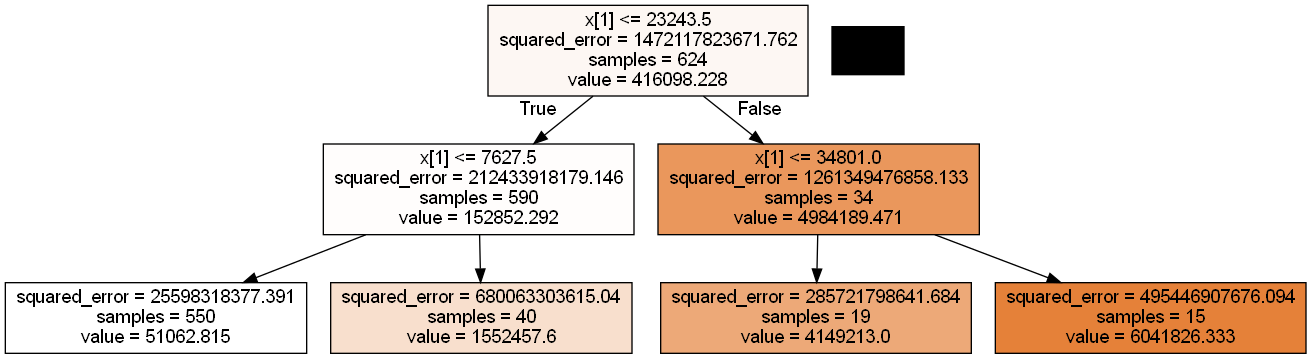

In [104]:
#Visualize the Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus  # You need to import this library to work with Graphviz
from IPython.display import Image
from sklearn import tree
from io import StringIO

#Create a StringIO object to hold the visualization
dot_data = StringIO()

#Export the Decision Tree as a Graphviz dot file
export_graphviz(decision_Regressor, out_file=dot_data, filled=True)

#Use pydotplus to create an image from the dot file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Create an Image from the graph
Image(graph.create_png())

# Random Forest Regression

In [105]:
#Import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

#Create an object forest by calling a method RandomForestRegressor()
forest_Regressor = RandomForestRegressor(n_estimators = 1000,random_state=0)

#Train the Model by calling a fit() method
forest_Regressor.fit(X_train, y_train)

#Predict the Test Set
y_pred_random = forest_Regressor.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(forest_Regressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(forest_Regressor.score(X_test, y_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.9983227785533678
-----Test set statistics-----
R-squared of the model in test set is: 0.9928937643066693


# Ridge Regression

In [106]:
#Import Ridge from sklearn library
from sklearn.linear_model import Ridge

#Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

#Predict the Test Set
y_pred_ridge = ridge.predict(X_test)


#Display the score by using ridge object
print("-----Training set statistics-----")
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))

print("-----Test set statistics (ridge)-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))

#Alpha = 10 is a parameter using a fit() method
ridge_10 = Ridge(alpha = 10).fit(X_train, y_train)

#Predict the Test Set
y_pred_ridge_10 = ridge.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("Training set score: {:.2f}".format(ridge_10.score(X_train, y_train)))

print("-----Test set statistics (ridge_10)-----")
print("R-squared of the model in test set is: {}".format(ridge_10.score(X_test, y_test)))


#Alpha = 0.1 is a parameter using a fit() method
ridge_01 = Ridge(alpha = 0.1).fit(X_train, y_train)

#Predict the Test Set
y_pred_ridge_01 = ridge.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("Training set score: {:.2f}".format(ridge_01.score(X_train, y_train)))

print("-----Test set statistics (ridge_01)-----")
print("R-squared of the model in test set is: {}".format(ridge_01.score(X_test, y_test)))

-----Training set statistics-----
Training set score: 0.96
-----Test set statistics (ridge)-----
R-squared of the model in test set is: 0.9724521595446319
-----Training set statistics-----
Training set score: 0.96
-----Test set statistics (ridge_10)-----
R-squared of the model in test set is: 0.9725300719931784
-----Training set statistics-----
Training set score: 0.96
-----Test set statistics (ridge_01)-----
R-squared of the model in test set is: 0.9724357295270525


# Using GridSearchCV for parameter optimization in Ridge Regression

In [107]:
#Import GridSearchCV from sklearn library
from sklearn.model_selection import GridSearchCV

#Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, y_train)

ridge = ridgeregr.best_estimator_

#Making the prediction for the test and training set 
y_train_pred = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(ridge.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
-----Training set statistics-----
R-squared of the model in training set is: 0.9582756396458393
-----Test set statistics-----
R-squared of the model in test set is: 0.9724521595446319


# Lasso Regression

In [108]:
#Import Lasso from sklearn library
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

#prediction the training and test values
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

#Print the R-squared values
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

#we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)

#Print the R-squared values
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

#Print the R-squared values
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.96
Test set score: 0.97
Number of features used: 12
Training set score: 0.96
Test set score: 0.97
Number of features used: 12
Training set score: 0.96
Test set score: 0.97
Number of features used: 12


# Using GridSearch Parameter optimization in Lasso Regression

In [109]:
#Using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.0001, 1]
                    }, verbose=1)

lassoregr.fit(X_train, y_train)

lasso = lassoregr.best_estimator_

#Make predictions for test and training sets
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(lasso.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, y_test)))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
-----Training set statistics-----
R-squared of the model in training set is: 0.9582778042578134
-----Test set statistics-----
R-squared of the model in test set is: 0.9724338419680992


# ElasticNet Regression

In [110]:
#Import ElasticNet from sklearn library
from sklearn.linear_model import ElasticNet

#Train the model
e_net = ElasticNet(alpha = 0.01)

#Fit the e_net model
e_net.fit(X_train, y_train)

#Calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)

#Print the mean square error, the coefficients and the intercept
print("Mean Squared Error on test set", mean_squared_error)
print(e_net.coef_, e_net.intercept_)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(e_net.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(e_net.score(X_test, y_test)))

Mean Squared Error on test set 62345882337.90142
[ 3.69174877e+03  1.37859500e+02  3.34062833e+04  4.28395000e+04
 -6.01229550e+04 -2.33352681e+05  8.25599333e+04  4.79899226e+04
 -1.86055626e+05 -6.11453922e+04  1.18090071e+05 -1.14031762e+05] -7415829.583015052
-----Training set statistics-----
R-squared of the model in training set is: 0.9582589015519751
-----Test set statistics-----
R-squared of the model in test set is: 0.9724829543911752


# Support Vector Machine Regression

In [111]:
#Import SVR from sklearn library
from sklearn.svm import SVR
svr= SVR()

#fit the svr 
svr.fit(X_train, y_train)

#Print the R-squared values
print("Training set score: {:.2f}".format(svr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(svr.score(X_test, y_test)))

Training set score: -0.12
Test set score: -0.16


# Support Vector Machine Regression using GridSearchCV

In [112]:
#Find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,1,0.1,10,100,1000],'gamma':[0.01,0.1,0.01,0.001,0.001, 1], 'kernel':['rbf']}
grid = GridSearchCV(SVR(),param_grid,verbose = 4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(grid.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(grid.score(X_test, y_test)))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.129 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.108 total time=   0.0s
[CV 3/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.134 total time=   0.0s
[CV 4/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 5/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.080 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.129 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.108 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.134 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.156 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.080 total time=   0.0s
[CV 1/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.129 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=0.01, kernel=rbf;

[CV 5/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.079 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.129 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.107 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.133 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.155 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.079 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.129 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.107 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.133 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.155 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.079 total time=   0.0s
[CV 1/5] END ........C=10, gamma=1, kernel=rbf;, score=-0.129 total time=   0.0s
[CV 2/5] END ........C=10, g

# K-Nearest Neighbors Regression

In [113]:
#Import KNeighborsRegressor from sklearn library
from sklearn.neighbors import KNeighborsRegressor
knn_Regressor = KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5)
knn_Regressor.fit(X_train, y_train)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(knn_Regressor.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(knn_Regressor.score(X_test, y_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.9657357586555504
-----Test set statistics-----
R-squared of the model in test set is: 0.9598275255346133


# Fitting Data with Normalization

In [114]:
#View the Data
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TIME_PERIOD           780 non-null    int64  
 1   Number of Passengers  780 non-null    int64  
 2   Number of Flights     780 non-null    int64  
 3   tra_cov_NAT           780 non-null    float64
 4   aircraft_AC_NJ        780 non-null    float64
 5   aircraft_AC_RJ        780 non-null    float64
 6   aircraft_AC_RT        780 non-null    float64
 7   aircraft_AC_WJ        780 non-null    float64
 8   distance_KM1500-1999  780 non-null    float64
 9   distance_KM300-499    780 non-null    float64
 10  distance_KM500-999    780 non-null    float64
 11  distance_KM_GE2000    780 non-null    float64
 12  distance_KM_LT300     780 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 79.3 KB


Normalize the X variable Number of Flights

In [115]:
from sklearn.preprocessing import MinMaxScaler

#Create the minmaxscaler object
scaler = MinMaxScaler()
result_df['Number of Flights Scaled'] = scaler.fit_transform(result_df[['Number of Flights']])

In [116]:
#View Result_df
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TIME_PERIOD               780 non-null    int64  
 1   Number of Passengers      780 non-null    int64  
 2   Number of Flights         780 non-null    int64  
 3   tra_cov_NAT               780 non-null    float64
 4   aircraft_AC_NJ            780 non-null    float64
 5   aircraft_AC_RJ            780 non-null    float64
 6   aircraft_AC_RT            780 non-null    float64
 7   aircraft_AC_WJ            780 non-null    float64
 8   distance_KM1500-1999      780 non-null    float64
 9   distance_KM300-499        780 non-null    float64
 10  distance_KM500-999        780 non-null    float64
 11  distance_KM_GE2000        780 non-null    float64
 12  distance_KM_LT300         780 non-null    float64
 13  Number of Flights Scaled  780 non-null    float64
dtypes: float64

In [117]:
#Create dependent and independent variables from normalized data
y_minmax = result_df.iloc[:, 1].values
X_minmax = result_df.drop(['Number of Passengers','Number of Flights'], axis=1).values

In [118]:
#View the y_minmax variable 
print(y_minmax)

[  62358   31836   12687    9886    8710    5367    5059    1817       0
    3312     342    1095     529  126242   85643   11070    9828    3128
    5873    4257    5479    5255    7682   51890  122966   19259    9754
    2330     657    5110     960     736     598     399       0     565
     162     345      96    1136    1287    2118    4298     706     312
    1722    1789    1116    1466     212       0     776  741337  652758
  489779  588820  493277  581847  840521  844419  880241  828701  782086
  682512   18572     678      40    1027    1310     749     530     154
      96     118       0      90       0      72 4432156 3872443 3530238
 3560743 3764348 3955130 4222352 4795481 5167454 5388778 5930060 6125130
 1176451 4871595 3778687 3785481 3696401 3823146 3920680 3995468 4414552
 4988930 5265847 5428726 5928006 1305518 7587947 6362894 5557262 5519605
 5302771 5388819 5650372 6305593 6886810 6988518 7129149 7234410 1739814
 4571706 3684039 3772438 3834816 3906505 4041493 42

In [119]:
#View the X_minmax variable
print(X_minmax)

[[2.00800000e+03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.45646368e-03]
 [2.00900000e+03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.88483730e-03]
 [2.01000000e+03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.15393492e-03]
 ...
 [2.01800000e+03 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.15393492e-04]
 [2.01900000e+03 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 6.59391382e-05]
 [2.02000000e+03 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 3.29695691e-05]]


In [120]:
#View the shape of X_minmax and y_minmax
X_minmax.shape, y_minmax.shape

((780, 12), (780,))

In [121]:
#Split the data into features (X_minmax) and target variable (y_minmax)
X_minmax_train, X_minmax_test, y_minmax_train, y_minmax_test = train_test_split(X_minmax, y_minmax, test_size=0.2)

In [122]:
#View the shapes of the split data
X_minmax_train.shape, X_minmax_test.shape, y_minmax_train.shape, y_minmax_test.shape

((624, 12), (156, 12), (624,), (156,))

# Fit the Regression Models using normalized Data

# Linear Regression Model

In [123]:
#Import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

#Initialise an object slr by calling a method named as 'LinearRegression()'
mlr = LinearRegression()

#Fitting the OLS model
mlr.fit(X_minmax_train, y_minmax_train)

# Predict the results for the training and testing
y_train_pred = mlr.predict(X_minmax_train)
y_test_pred = mlr.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(mlr.score(X_minmax_train, y_minmax_train)))

print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(mlr.score(X_minmax_test, y_minmax_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.9587912461930846
-----Test set statistics-----
R-squared of the model in test set is: 0.9752911986569213


# Decision Tree Regression (Normalized Data)

In [124]:
#Import DecisionTreeRegressor from the sklearn library
from sklearn.tree import DecisionTreeRegressor

#Initialise an object by calling a method DecisionTreeRegressor()
decision_Regressor = DecisionTreeRegressor(max_depth=2, random_state=0)  # You can adjust max_depth as needed

#Pass the training set through the decision_Regressor
decision_Regressor.fit(X_minmax_train, y_minmax_train)

#Predict the X_test values
y_pred_decision=decision_Regressor.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(decision_Regressor.score(X_minmax_train, y_minmax_train)))

print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(decision_Regressor.score(X_minmax_test, y_minmax_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.9391749511283878
-----Test set statistics-----
R-squared of the model in test set is: 0.9657684280124226


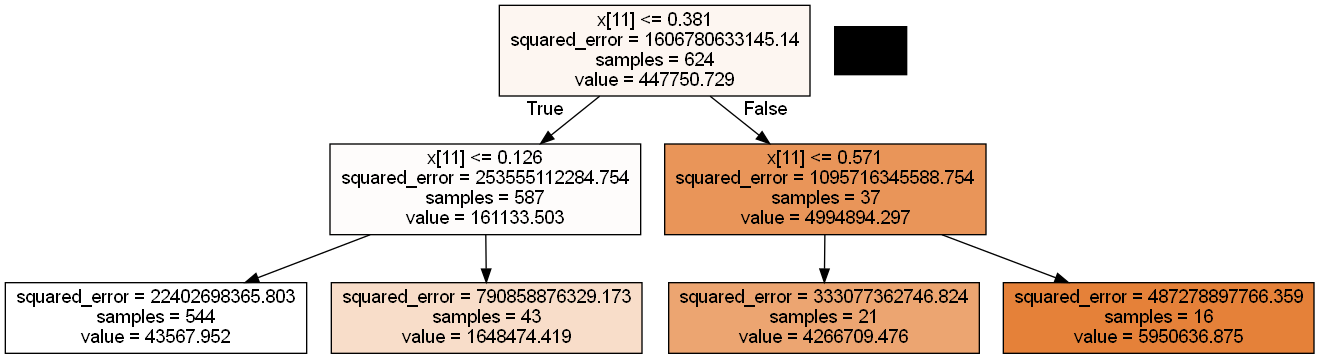

In [125]:
#Visualize the Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus  # You need to import this library to work with Graphviz
from IPython.display import Image
from sklearn import tree
from io import StringIO

#Create a StringIO object to hold the visualization
dot_data = StringIO()

#Export the Decision Tree as a Graphviz dot file
export_graphviz(decision_Regressor, out_file=dot_data, filled=True)

#Use pydotplus to create an image from the dot file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Create an Image from the graph
Image(graph.create_png())

# Random Forest (Normalized Data)

In [126]:
#Import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

#Create an object forest by calling a method RandomForestRegressor()
forest_Regressor = RandomForestRegressor(n_estimators = 1000,random_state=0)

#Train the Model by calling a fit() method
forest_Regressor.fit(X_minmax_train, y_minmax_train)

#Predict the Test Set
y_pred_random = forest_Regressor.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(forest_Regressor.score(X_minmax_train, y_minmax_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(forest_Regressor.score(X_minmax_test, y_minmax_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.9980606343610319
-----Test set statistics-----
R-squared of the model in test set is: 0.995761897227075


# Ridge Regression with Normalized Data

In [127]:
#Import Ridge from sklearn library
from sklearn.linear_model import Ridge

#Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_minmax_train, y_minmax_train)

#Predict the Test Set
y_pred_ridge = ridge.predict(X_minmax_test)


#Display the score by using ridge object
print("-----Training set statistics-----")
print("Training set score: {:.2f}".format(ridge.score(X_minmax_train, y_minmax_train)))

print("-----Test set statistics (ridge)-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_minmax_test, y_minmax_test)))

#Alpha = 10 is a parameter using a fit() method
ridge_10 = Ridge(alpha = 10).fit(X_minmax_train, y_minmax_train)

#Predict the Test Set
y_pred_ridge_10 = ridge.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("Training set score: {:.2f}".format(ridge_10.score(X_minmax_train, y_minmax_train)))

print("-----Test set statistics (ridge_10)-----")
print("R-squared of the model in test set is: {}".format(ridge_10.score(X_minmax_test, y_minmax_test)))


#Alpha = 0.1 is a parameter using a fit() method
ridge_01 = Ridge(alpha = 0.1).fit(X_minmax_train, y_minmax_train)

#Predict the Test Set
y_pred_ridge_01 = ridge.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("Training set score: {:.2f}".format(ridge_01.score(X_minmax_train, y_minmax_train)))

print("-----Test set statistics (ridge_01)-----")
print("R-squared of the model in test set is: {}".format(ridge_01.score(X_minmax_test, y_minmax_test)))

-----Training set statistics-----
Training set score: 0.95
-----Test set statistics (ridge)-----
R-squared of the model in test set is: 0.9648747103105837
-----Training set statistics-----
Training set score: 0.80
-----Test set statistics (ridge_10)-----
R-squared of the model in test set is: 0.791934679164545
-----Training set statistics-----
Training set score: 0.96
-----Test set statistics (ridge_01)-----
R-squared of the model in test set is: 0.9748823190997833


# using GridSearchCV for parameter optimization in Ridge Regression for normalized data

In [128]:
#Import GridSearchCV from sklearn library
from sklearn.model_selection import GridSearchCV

#Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [10, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_minmax_train, y_minmax_train)

ridge = ridgeregr.best_estimator_

#Making the prediction for the test and training set 
yminmax_train_pred = ridge.predict(X_minmax_train)
yminmax_test_pred_ridge = ridge.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(ridge.score(X_minmax_train, y_minmax_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_minmax_test, y_minmax_test)))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
-----Training set statistics-----
R-squared of the model in training set is: 0.9586992060159693
-----Test set statistics-----
R-squared of the model in test set is: 0.9748823190997833


# Lasso Regression 

In [129]:
#Import Lasso from sklearn library
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_minmax_train, y_minmax_train)

#prediction the training and test values
y_train_pred_lasso = lasso.predict(X_minmax_train)
y_test_pred_lasso = lasso.predict(X_minmax_test)

#Print the R-squared values
print("Training set score: {:.2f}".format(lasso.score(X_minmax_train, y_minmax_train)))
print("Test set score: {:.2f}".format(lasso.score(X_minmax_test, y_minmax_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

#we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01).fit(X_minmax_train, y_minmax_train)

#Print the R-squared values
print("Training set score: {:.2f}".format(lasso001.score(X_minmax_train, y_minmax_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_minmax_test, y_minmax_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

#Print the R-squared values
lasso00001 = Lasso(alpha=0.0001).fit(X_minmax_train, y_minmax_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_minmax_train, y_minmax_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_minmax_test, y_minmax_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.96
Test set score: 0.98
Number of features used: 12
Training set score: 0.96
Test set score: 0.98
Number of features used: 12
Training set score: 0.96
Test set score: 0.98
Number of features used: 12


# Using GridseachCV parameter optimization in Lasso Regression for Normalized data

In [130]:
#Using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.0001, 0.01, 1]
                    }, verbose=1)

lassoregr.fit(X_minmax_train, y_minmax_train)

lasso = lassoregr.best_estimator_

#Make predictions for test and training sets
y_preds_train = lasso.predict(X_minmax_train)
y_preds_test_lasso = lasso.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(lasso.score(X_minmax_train, y_minmax_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_minmax_test, y_minmax_test)))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
-----Training set statistics-----
R-squared of the model in training set is: 0.9587912460991629
-----Test set statistics-----
R-squared of the model in test set is: 0.9752909601412951


# Elastic Net Regression using Normalized Data

In [131]:
#Import ElasticNet from sklearn library
from sklearn.linear_model import ElasticNet

#Train the model
e_net = ElasticNet(alpha = 0.01)

#Fit the e_net model
e_net.fit(X_minmax_train,y_minmax_train)

#Calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_minmax_test)
mean_squared_error = np.mean((y_pred_elastic - y_minmax_test)**2)

#Print the mean square error, the coefficients and the intercept
print("Mean Squared Error on test set", mean_squared_error)
print(e_net.coef_, e_net.intercept_)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(e_net.score(X_minmax_train, y_minmax_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(e_net.score(X_minmax_test, y_minmax_test)))

Mean Squared Error on test set 136967842503.35161
[ 3.18908580e+03 -2.33565856e+05  5.31267223e+05 -4.89772800e+04
 -1.53842881e+05  9.80197440e+04  4.43967282e+04 -7.17338703e+04
 -3.04267494e+04  9.23874762e+04 -1.45005960e+05  5.92610954e+06] -6257511.771523698
-----Training set statistics-----
R-squared of the model in training set is: 0.9147117051269609
-----Test set statistics-----
R-squared of the model in test set is: 0.9219923199472849


# Support Vector Machine Regression for Normalized Data

In [132]:
#Import SVR from sklearn library
from sklearn.svm import SVR
svr= SVR()

#fit the svr 
svr.fit(X_minmax_train,y_minmax_train)

#Print the R-squared values
print("Training set score: {:.2f}".format(svr.score(X_minmax_train,y_minmax_train)))
print("Test set score: {:.2f}".format(svr.score(X_minmax_test,y_minmax_test)))

Training set score: -0.12
Test set score: -0.13


# Support Vector Machine Regression using GridSearchCV for normalized data

In [133]:
#Find best hyper parameters
param_grid = {'C':[0.01,0.1,10,100,1000],'gamma':[0.01,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVR(),param_grid,verbose = 4)
grid.fit(X_minmax_train,y_minmax_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_minmax_test)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(grid.score(X_minmax_train, y_minmax_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(grid.score(X_minmax_test, y_minmax_test)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.162 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.127 total time=   0.0s
[CV 3/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.103 total time=   0.0s
[CV 4/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.112 total time=   0.0s
[CV 5/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.134 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.162 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.127 total time=   0.0s
[CV 3/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.103 total time=   0.0s
[CV 4/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.112 total time=   0.0s
[CV 5/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-0.134 total time=   0.0s
[CV 1/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-0.162 total time=   0.0s
[CV 2/5] END ...C=0.01, gamma=0.01, kernel=rbf;

[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.102 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.110 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.133 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.160 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.124 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.101 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.108 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.132 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.161 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.102 total time=   0.0s
[CV 4/5] END ...C=1000, gamm

# K-NN (Normalized Data)

In [134]:
#Import KNeighborsRegressor from sklearn library
from sklearn.neighbors import KNeighborsRegressor
knn_Regressor = KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5)
knn_Regressor.fit(X_minmax_train, y_minmax_train)

#Print the R-squared values
print("-----Training set statistics-----")
print("R-squared of the model in training set is: {}".format(knn_Regressor.score(X_minmax_train, y_minmax_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(knn_Regressor.score(X_minmax_test, y_minmax_test)))

-----Training set statistics-----
R-squared of the model in training set is: 0.8784882301212174
-----Test set statistics-----
R-squared of the model in test set is: 0.8328684438595593


# Fitting Regression Models Using Standard scaler

In [135]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TIME_PERIOD               780 non-null    int64  
 1   Number of Passengers      780 non-null    int64  
 2   Number of Flights         780 non-null    int64  
 3   tra_cov_NAT               780 non-null    float64
 4   aircraft_AC_NJ            780 non-null    float64
 5   aircraft_AC_RJ            780 non-null    float64
 6   aircraft_AC_RT            780 non-null    float64
 7   aircraft_AC_WJ            780 non-null    float64
 8   distance_KM1500-1999      780 non-null    float64
 9   distance_KM300-499        780 non-null    float64
 10  distance_KM500-999        780 non-null    float64
 11  distance_KM_GE2000        780 non-null    float64
 12  distance_KM_LT300         780 non-null    float64
 13  Number of Flights Scaled  780 non-null    float64
dtypes: float64

In [136]:
from sklearn.preprocessing import StandardScaler

#Create the standardscaler object
scaler = StandardScaler()
result_df['Number of Flights standardised'] = scaler.fit_transform(result_df[['Number of Flights']])

In [137]:
#View the dataset to check the new standardised variable has been created
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TIME_PERIOD                     780 non-null    int64  
 1   Number of Passengers            780 non-null    int64  
 2   Number of Flights               780 non-null    int64  
 3   tra_cov_NAT                     780 non-null    float64
 4   aircraft_AC_NJ                  780 non-null    float64
 5   aircraft_AC_RJ                  780 non-null    float64
 6   aircraft_AC_RT                  780 non-null    float64
 7   aircraft_AC_WJ                  780 non-null    float64
 8   distance_KM1500-1999            780 non-null    float64
 9   distance_KM300-499              780 non-null    float64
 10  distance_KM500-999              780 non-null    float64
 11  distance_KM_GE2000              780 non-null    float64
 12  distance_KM_LT300               780 

In [138]:
#Split the data into dependent and independent variable
y_standardised = result_df.iloc[:, 1].values
X_standardised = result_df.drop(['Number of Passengers','Number of Flights', "Number of Flights Scaled"], axis=1).values

In [139]:
#View the y_standardised variable
print(y_standardised)

[  62358   31836   12687    9886    8710    5367    5059    1817       0
    3312     342    1095     529  126242   85643   11070    9828    3128
    5873    4257    5479    5255    7682   51890  122966   19259    9754
    2330     657    5110     960     736     598     399       0     565
     162     345      96    1136    1287    2118    4298     706     312
    1722    1789    1116    1466     212       0     776  741337  652758
  489779  588820  493277  581847  840521  844419  880241  828701  782086
  682512   18572     678      40    1027    1310     749     530     154
      96     118       0      90       0      72 4432156 3872443 3530238
 3560743 3764348 3955130 4222352 4795481 5167454 5388778 5930060 6125130
 1176451 4871595 3778687 3785481 3696401 3823146 3920680 3995468 4414552
 4988930 5265847 5428726 5928006 1305518 7587947 6362894 5557262 5519605
 5302771 5388819 5650372 6305593 6886810 6988518 7129149 7234410 1739814
 4571706 3684039 3772438 3834816 3906505 4041493 42

In [140]:
#View the x_standardised variable
print(X_standardised)

[[ 2.00800000e+03  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -3.52533938e-01]
 [ 2.00900000e+03  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -3.69845462e-01]
 [ 2.01000000e+03  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -3.81497449e-01]
 ...
 [ 2.01800000e+03  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+00 -3.88488642e-01]
 [ 2.01900000e+03  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+00 -3.88821556e-01]
 [ 2.02000000e+03  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.00000000e+00 -3.89043498e-01]]


In [141]:
#View the shape of X_standardised and y_standardised
X_standardised.shape, y_standardised.shape

((780, 12), (780,))

In [142]:
# Split the data into features (X_standardised) and target variable (y_standardised)
X_standardised_train, X_standardised_test, y_standardised_train, y_standardised_test = train_test_split(X_standardised, y_standardised, test_size=0.2)

### Fit Regression using standardised data

In [143]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Create a StandardScaler instance
scaler = StandardScaler()

# Scale the training and test data
X_standardised_train = scaler.fit_transform(X_standardised_train)
X_standardised_test = scaler.transform(X_standardised_test)

#Define models with their respective hyperparameters
models_standardised = [
    ('Linear Regression', LinearRegression()),
    ('Decision_Regressor', DecisionTreeRegressor(max_depth=2, random_state=0)),
    ('Ridge Regression alpha=10', Ridge(alpha=10)),
    ('Ridge Regression alpha=0.1', Ridge(alpha=0.1)),
    ('Ridge Regression alpha=1.0', Ridge(alpha=1.0)),
    ('Lasso Regression alpha=0.01', Lasso(alpha=0.01)),
    ('Lasso Regression alpha=1.0', Lasso(alpha=0.10)),
    ('Lasso Regression alpha=0.001', Lasso(alpha=0.001)),
    ('ElasticNet Regression alpha = 0.01', ElasticNet(alpha = 0.1)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=1000, random_state=0)),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5))
]

#Train and evaluate each model
for name, model in models_standardised:
    model.fit(X_standardised_train, y_standardised_train)
    y_pred_standardised = model.predict(X_standardised_test)
    r2_standardised = r2_score(y_standardised_test, y_pred_standardised)
    print(f"{name} - R-squared (standardised scaled): {r2_standardised}")
    

Linear Regression - R-squared (standardised scaled): 0.9788200607441911
Decision_Regressor - R-squared (standardised scaled): 0.9629871548909422
Ridge Regression alpha=10 - R-squared (standardised scaled): 0.977824267302465
Ridge Regression alpha=0.1 - R-squared (standardised scaled): 0.9788130243003967
Ridge Regression alpha=1.0 - R-squared (standardised scaled): 0.9787468541376834
Lasso Regression alpha=0.01 - R-squared (standardised scaled): 0.9788200612916806
Lasso Regression alpha=1.0 - R-squared (standardised scaled): 0.9788200660973682
Lasso Regression alpha=0.001 - R-squared (standardised scaled): 0.9788200607997931
ElasticNet Regression alpha = 0.01 - R-squared (standardised scaled): 0.9741497371698827
Random Forest Regression - R-squared (standardised scaled): 0.9949496830510555
Support Vector Regression - R-squared (standardised scaled): -0.17017529687256316
K-Nearest Neighbors Regression - R-squared (standardised scaled): 0.9001521638654058


## Hyperparameter tuning using gridsearchCV for standardised data

In [144]:
#Define models with their respective parameter grids for hyperparameter tuning
models_with_tuning = [
    ('Ridge Regression', Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    ('Lasso Regression', Lasso(), {'alpha': [0.01, 1.0, 0.0001]}),
    ('Support Vector Regression', SVR(), {'C': [0.01,0.1,1,10,100,1000], 'gamma': [0.01,0.1,0.01,0.001,0.001]})
]

#Train and evaluate each model using GridSearchCV
for name, model, param_grid in models_with_tuning:
    grid = GridSearchCV(model, param_grid, verbose =4)
    grid.fit(X_standardised_train, y_standardised_train)
    
    best_model = grid.best_estimator_
    y_pred_standardised = best_model.predict(X_standardised_test)
    
    r2_standardised = r2_score(y_standardised_test, y_pred_standardised)
    
    print(f"{name} - R-squared tuned(standardised): {r2_standardised}, Best Params: {grid.best_params_}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .........................alpha=0.1;, score=0.967 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.970 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.939 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.955 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.922 total time=   0.0s
[CV 1/5] END .........................alpha=1.0;, score=0.967 total time=   0.0s
[CV 2/5] END .........................alpha=1.0;, score=0.970 total time=   0.0s
[CV 3/5] END .........................alpha=1.0;, score=0.939 total time=   0.0s
[CV 4/5] END .........................alpha=1.0;, score=0.955 total time=   0.0s
[CV 5/5] END .........................alpha=1.0;, score=0.922 total time=   0.0s
[CV 1/5] END ........................alpha=10.0;, score=0.966 total time=   0.0s
[CV 2/5] END ........................alpha=10.0;,

[CV 2/5] END .................C=1, gamma=0.001;, score=-0.125 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.001;, score=-0.090 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.001;, score=-0.121 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.122 total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.01;, score=-0.129 total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.01;, score=-0.125 total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.01;, score=-0.090 total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.01;, score=-0.121 total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.01;, score=-0.122 total time=   0.0s
[CV 1/5] END ..................C=10, gamma=0.1;, score=-0.129 total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.1;, score=-0.125 total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.1;, score=-0.090 total time=   0.0s
[CV 4/5] END ...............

# Building regressions Model using Label Encoder

## For Label encoded with no feature scaling

In [145]:
transport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tra_cov               780 non-null    object
 1   aircraft              780 non-null    object
 2   distance              780 non-null    object
 3   TIME_PERIOD           780 non-null    int64 
 4   Number of Passengers  780 non-null    int64 
 5   Number of Flights     780 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 36.7+ KB


In [146]:
from sklearn.preprocessing import LabelEncoder

#Initialize LabelEncoder
label_encoder = LabelEncoder()

#Fit and transform the categorical columns
transport_data['tracov_encoded'] = label_encoder.fit_transform(transport_data['tra_cov'])
transport_data['aircraft_encoded'] = label_encoder.fit_transform(transport_data['aircraft'])
transport_data['distance_encoded'] = label_encoder.fit_transform(transport_data['distance'])


#Display the transformed data
print(transport_data)


    tra_cov aircraft     distance  TIME_PERIOD  Number of Passengers  \
0      INTL    AC_JJ  KM1000-1499         2008                 62358   
1      INTL    AC_JJ  KM1000-1499         2009                 31836   
2      INTL    AC_JJ  KM1000-1499         2010                 12687   
3      INTL    AC_JJ  KM1000-1499         2011                  9886   
4      INTL    AC_JJ  KM1000-1499         2012                  8710   
..      ...      ...          ...          ...                   ...   
775     NAT    AC_WJ     KM_LT300         2016                     0   
776     NAT    AC_WJ     KM_LT300         2017                   186   
777     NAT    AC_WJ     KM_LT300         2018                  1103   
778     NAT    AC_WJ     KM_LT300         2019                   707   
779     NAT    AC_WJ     KM_LT300         2020                    70   

     Number of Flights  tracov_encoded  aircraft_encoded  distance_encoded  
0                  331               0                 0  

In [147]:
#View the transport data to check if the categorical variables with label encoders have been created
transport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tra_cov               780 non-null    object
 1   aircraft              780 non-null    object
 2   distance              780 non-null    object
 3   TIME_PERIOD           780 non-null    int64 
 4   Number of Passengers  780 non-null    int64 
 5   Number of Flights     780 non-null    int64 
 6   tracov_encoded        780 non-null    int32 
 7   aircraft_encoded      780 non-null    int32 
 8   distance_encoded      780 non-null    int32 
dtypes: int32(3), int64(3), object(3)
memory usage: 45.8+ KB


In [148]:
#Split into dependent and independent variables
y = transport_data.iloc[:, 4].values
X = transport_data.drop(['Number of Passengers', 'tra_cov','aircraft','distance'], axis=1).values


# Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [149]:
#View the shpe of X and Y
X.shape, y.shape

((780, 5), (780,))

In [150]:
#Print X_train
print(X_train)

[[ 2010   464     1     4     5]
 [ 2013     0     1     1     4]
 [ 2018 15030     0     4     4]
 ...
 [ 2017     4     0     4     2]
 [ 2020   897     0     4     2]
 [ 2013  3943     0     3     3]]


In [151]:
#Print y_train
print(y_train)

[  51801       0 3729640       0       0     529  131070 5928006   11070
  828701    2584  494523 4871595       0       0       0       0   32116
   57881       0   18038       0       0     345       0       0       0
  138898       0       0      91       0       0     598  741337       0
     563  185503    3489       0       0       0     212       0 3995468
       0  408413 4795481 5428726       0       0   12987       0       0
 1642014  300716       0     268       0  216601       0       0     565
   14304   31836 5302771  426959   12455 1386683  880241 1176451       0
       0       0       0       0     902       0   19259  338335     109
      62     393       0       0  125090   52542  406076       0       0
    1338       0   48896   12687 1739814       0  132838       0  192909
       0       0 4988930       0   77470    1171   63632  264329     996
       0   51155       0      12    5873      14       0 1717173       0
     186      21    3107       0       0       0   

# Regression Modelling using labeled encoded data for data with no feature scaling

In [152]:
#Define models with their respective hyperparameters
models_labeled = [
    ('Linear Regression', LinearRegression()),
    ('Decision_Regressor', DecisionTreeRegressor(max_depth=2, random_state=0)),
    ('Ridge Regression alpha=10', Ridge(alpha=10)),
    ('Ridge Regression alpha=0.1', Ridge(alpha=0.1)),
    ('Ridge Regression alpha=1.0', Ridge(alpha=1.0)),
    ('Lasso Regression alpha=0.0001', Lasso(alpha=0.0001)),
    ('Lasso Regression alpha=0.01', Lasso(alpha=0.01)),
    ('Lasso Regression alpha=1.0', Lasso(alpha=1.0)),
    ('ElasticNet Regression alpha = 0.01', ElasticNet(alpha = 0.01)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=1000, random_state=0)),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5))
]

#Train and evaluate each model
for name, model in models_labeled:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -  R-squared: {r2}")

Linear Regression -  R-squared: 0.9307967459085817
Decision_Regressor -  R-squared: 0.9227991858934778
Ridge Regression alpha=10 -  R-squared: 0.9308157121358978
Ridge Regression alpha=0.1 -  R-squared: 0.9307969551079684
Ridge Regression alpha=1.0 -  R-squared: 0.9307988185765347
Lasso Regression alpha=0.0001 -  R-squared: 0.9307967459133907
Lasso Regression alpha=0.01 -  R-squared: 0.930796746388624
Lasso Regression alpha=1.0 -  R-squared: 0.9307967939091019
ElasticNet Regression alpha = 0.01 -  R-squared: 0.9308030749329352
Random Forest Regression -  R-squared: 0.9865422991208926
Support Vector Regression -  R-squared: -0.12930823732241814
K-Nearest Neighbors Regression -  R-squared: 0.9311614976109751


## Visualize the Decision Tree Regression

In [153]:
#Create the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
Decision_Regressor = DecisionTreeRegressor(max_depth=2, random_state=0)
# Fit the model
Decision_Regressor.fit(X_train, y_train)

# Assuming 'Decision_Regressor' is your trained DecisionTreeRegressor
Decision_Regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

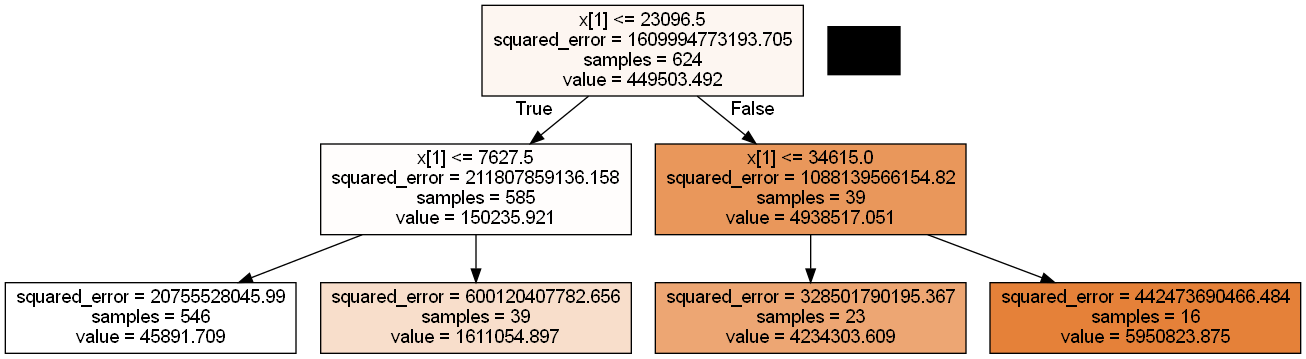

In [154]:
#Visualize the Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus  # You need to import this library to work with Graphviz
from IPython.display import Image
from sklearn import tree
from io import StringIO

#Create a StringIO object to hold the visualization
dot_data = StringIO()

#Export the Decision Tree as a Graphviz dot file
export_graphviz(Decision_Regressor, out_file=dot_data, filled=True)

#Use pydotplus to create an image from the dot file
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Create an Image from the graph
Image(graph.create_png())

# Regression Modelling using labeled encoded data for data with no feature scaling using hyperparameter tuning

In [155]:
#Define models with their respective parameter grids for hyperparameter tuning
models_with_tuning = [
    ('Ridge Regression', Ridge(), {'alpha': [0.1, 1.0, 10]}),
    ('Lasso Regression', Lasso(), {'alpha': [0.0001, 0.01, 1.0]}),
    ('Support Vector Regression', SVR(), {'C': [0.01,0.1,1,10,100,1000], 'gamma': [0.01,0.1,0.01,0.001,0.001]})
]

#Train and evaluate each model using GridSearchCV
for name, model, param_grid in models_with_tuning:
    grid = GridSearchCV(model, param_grid, verbose =4)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - R-squared tuned: {r2}, Best Params: {grid.best_params_}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .........................alpha=0.1;, score=0.952 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.971 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.935 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.914 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.960 total time=   0.0s
[CV 1/5] END .........................alpha=1.0;, score=0.952 total time=   0.0s
[CV 2/5] END .........................alpha=1.0;, score=0.971 total time=   0.0s
[CV 3/5] END .........................alpha=1.0;, score=0.935 total time=   0.0s
[CV 4/5] END .........................alpha=1.0;, score=0.914 total time=   0.0s
[CV 5/5] END .........................alpha=1.0;, score=0.960 total time=   0.0s
[CV 1/5] END ..........................alpha=10;, score=0.952 total time=   0.0s
[CV 2/5] END ..........................alpha=10;,

[CV 4/5] END .................C=1, gamma=0.001;, score=-0.088 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.201 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.001;, score=-0.123 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.001;, score=-0.113 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.001;, score=-0.115 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.001;, score=-0.088 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.201 total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.01;, score=-0.122 total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.01;, score=-0.113 total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.01;, score=-0.114 total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.01;, score=-0.088 total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.01;, score=-0.201 total time=   0.0s
[CV 1/5] END ...............

# Regression Modelling using labeled encoded data for data with standardization

In [156]:
#Split into dependent and independent variables
y = transport_data.iloc[:, 4].values
X = transport_data.drop(['Number of Passengers', 'tra_cov','aircraft','distance'], axis=1).values


# Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [157]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Creating a StandardScaler instance
scaler = StandardScaler()

#Scaling your training and test data
X_standardised_train = scaler.fit_transform(X_train)
X_standardised_test = scaler.transform(X_test)

# Regression Modelling using labeled encoded data for standardised data

In [158]:
#Define the models
models_standardised = [
    ('Linear Regression', LinearRegression()),
    ('Decision_Regressor', DecisionTreeRegressor(max_depth=2, random_state=0)),
    ('Ridge Regression alpha=10', Ridge(alpha=10)),
    ('Ridge Regression alpha=0.1', Ridge(alpha=0.1)),
    ('Ridge Regression alpha=1', Ridge(alpha=1)),    
    ('Lasso Regression alpha=1', Lasso(alpha=1)),
    ('Lasso Regression alpha=0.01', Lasso(alpha=0.01)),
    ('Lasso Regression alpha=0.0001', Lasso(alpha=0.0001)),
    ('ElasticNet Regression alpha = 0.01', ElasticNet(alpha = 0.01)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=1000, random_state=0)),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5))
]

#Train and evaluate each model
for name, model in models_standardised:
    model.fit(X_standardised_train, y_train)
    y_pred_standardised = model.predict(X_standardised_test)
    r2_standardised = r2_score(y_test, y_pred_standardised)
    print(f"{name} - R-squared (standardised scaled): {r2_standardised}")

Linear Regression - R-squared (standardised scaled): 0.9535109813771925
Decision_Regressor - R-squared (standardised scaled): 0.9368473581900763
Ridge Regression alpha=10 - R-squared (standardised scaled): 0.9531892432216963
Ridge Regression alpha=0.1 - R-squared (standardised scaled): 0.9535104811305072
Ridge Regression alpha=1 - R-squared (standardised scaled): 0.9535034125942897
Lasso Regression alpha=1 - R-squared (standardised scaled): 0.9535108997944379
Lasso Regression alpha=0.01 - R-squared (standardised scaled): 0.9535109805613572
Lasso Regression alpha=0.0001 - R-squared (standardised scaled): 0.9535109813690347
ElasticNet Regression alpha = 0.01 - R-squared (standardised scaled): 0.95346874856772
Random Forest Regression - R-squared (standardised scaled): 0.9846972817518269
Support Vector Regression - R-squared (standardised scaled): -0.1296828507055059
K-Nearest Neighbors Regression - R-squared (standardised scaled): 0.9862300198903345


# Regression Modelling using labeled encoded data for standardised data  using hyperparameter tuning

In [159]:
#Define models with their respective parameter grids for hyperparameter tuning
models_with_tuning = [
    ('Ridge Regression', Ridge(), {'alpha': [0.1, 1.0, 10]}),
    ('Lasso Regression', Lasso(), {'alpha': [0.0001, 0.01, 1.0]}),
    ('Support Vector Regression', SVR(), {'C': [0.01,0.1,1,10,100,1000], 'gamma': [0.01,0.1,0.01,0.001,0.001]})
]

#Train and evaluate each model using GridSearchCV
for name, model, param_grid in models_with_tuning:
    grid = GridSearchCV(model, param_grid, verbose =4)
    grid.fit(X_standardised_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_standardised_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - R-squared tuned: {r2}, Best Params: {grid.best_params_}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .........................alpha=0.1;, score=0.974 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.919 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.931 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.907 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.969 total time=   0.0s
[CV 1/5] END .........................alpha=1.0;, score=0.974 total time=   0.0s
[CV 2/5] END .........................alpha=1.0;, score=0.919 total time=   0.0s
[CV 3/5] END .........................alpha=1.0;, score=0.931 total time=   0.0s
[CV 4/5] END .........................alpha=1.0;, score=0.907 total time=   0.0s
[CV 5/5] END .........................alpha=1.0;, score=0.969 total time=   0.0s
[CV 1/5] END ..........................alpha=10;, score=0.974 total time=   0.0s
[CV 2/5] END ..........................alpha=10;,

[CV 4/5] END .................C=1, gamma=0.001;, score=-0.116 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.165 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.001;, score=-0.125 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.001;, score=-0.117 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.001;, score=-0.124 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.001;, score=-0.116 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.165 total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.01;, score=-0.125 total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.01;, score=-0.117 total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.01;, score=-0.124 total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.01;, score=-0.116 total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.01;, score=-0.165 total time=   0.0s
[CV 1/5] END ...............

# Regression Modelling using labeled encoded data for data using normalization 

In [160]:
from sklearn.preprocessing import MinMaxScaler

#Create the minmaxscaler object
scaler = MinMaxScaler()
transport_data['Number of Flights Scaled'] = scaler.fit_transform(transport_data[['Number of Flights']])

In [161]:
transport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tra_cov                   780 non-null    object 
 1   aircraft                  780 non-null    object 
 2   distance                  780 non-null    object 
 3   TIME_PERIOD               780 non-null    int64  
 4   Number of Passengers      780 non-null    int64  
 5   Number of Flights         780 non-null    int64  
 6   tracov_encoded            780 non-null    int32  
 7   aircraft_encoded          780 non-null    int32  
 8   distance_encoded          780 non-null    int32  
 9   Number of Flights Scaled  780 non-null    float64
dtypes: float64(1), int32(3), int64(3), object(3)
memory usage: 51.9+ KB


In [162]:
#Split into dependent and independent variables
y = transport_data.iloc[:, 4].values
X = transport_data.drop(['Number of Passengers', 'tra_cov','aircraft','distance','Number of Flights'], axis=1).values


#Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Regression Modelling using labeled encoded data for normalized data

In [163]:
#Define the models
models_normalized = [
    ('Linear Regression', LinearRegression()),
    ('Decision_Regressor', DecisionTreeRegressor(max_depth=2, random_state=0)),
    ('Ridge Regression alpha=10', Ridge(alpha=10)),
    ('Ridge Regression alpha=0.1', Ridge(alpha=0.1)),
    ('Ridge Regression alpha=1', Ridge(alpha=1)),    
    ('Lasso Regression alpha=1', Lasso(alpha=1)),
    ('Lasso Regression alpha=0.01', Lasso(alpha=0.01)),
    ('Lasso Regression alpha=0.0001', Lasso(alpha=0.0001)),
    ('ElasticNet Regression alpha = 0.01', ElasticNet(alpha = 0.01)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=1000, random_state=0)),
    ('Support Vector Regression', SVR()),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(algorithm='auto', leaf_size=30,metric='minkowski',
                                   metric_params=None, n_jobs=1, n_neighbors=5))
]

#Train and evaluate each model
for name, model in models_normalized:
    model.fit(X_train, y_train)
    y_pred_normalised = model.predict(X_test)
    r2_normalised = r2_score(y_test, y_pred_normalised)
    print(f"{name} - R-squared (normalised : {r2_normalised}")
    

Linear Regression - R-squared (normalised : 0.936438006656014
Decision_Regressor - R-squared (normalised : 0.9086063790979287
Ridge Regression alpha=10 - R-squared (normalised : 0.7390786407598162
Ridge Regression alpha=0.1 - R-squared (normalised : 0.9356443204822263
Ridge Regression alpha=1 - R-squared (normalised : 0.924911392614122
Lasso Regression alpha=1 - R-squared (normalised : 0.9364375572068667
Lasso Regression alpha=0.01 - R-squared (normalised : 0.9364380021380562
Lasso Regression alpha=0.0001 - R-squared (normalised : 0.9364380066110742
ElasticNet Regression alpha = 0.01 - R-squared (normalised : 0.8849734813173038
Random Forest Regression - R-squared (normalised : 0.983890218288265
Support Vector Regression - R-squared (normalised : -0.1343221236904366
K-Nearest Neighbors Regression - R-squared (normalised : 0.5157360373814968


# Regression Modelling using labeled encoded data for normalized data  using hyperparameter tuning

In [164]:
#Define models with their respective parameter grids for hyperparameter tuning
models_with_tuning = [
    ('Ridge Regression', Ridge(), {'alpha': [0.1, 1.0, 10]}),
    ('Lasso Regression', Lasso(), {'alpha': [0.0001, 0.01, 1.0]}),
    ('Support Vector Regression', SVR(), {'C': [0.01,0.1,1,10,100,1000], 'gamma': [0.01,0.1,0.01,0.001,0.001]})
]

#Train and evaluate each model using GridSearchCV
for name, model, param_grid in models_with_tuning:
    grid = GridSearchCV(model, param_grid, verbose =4)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - R-squared tuned: {r2}, Best Params: {grid.best_params_}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .........................alpha=0.1;, score=0.971 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.951 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.972 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.929 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.921 total time=   0.0s
[CV 1/5] END .........................alpha=1.0;, score=0.958 total time=   0.0s
[CV 2/5] END .........................alpha=1.0;, score=0.943 total time=   0.0s
[CV 3/5] END .........................alpha=1.0;, score=0.958 total time=   0.0s
[CV 4/5] END .........................alpha=1.0;, score=0.930 total time=   0.0s
[CV 5/5] END .........................alpha=1.0;, score=0.921 total time=   0.0s
[CV 1/5] END ..........................alpha=10;, score=0.719 total time=   0.0s
[CV 2/5] END ..........................alpha=10;,

[CV 3/5] END .................C=1, gamma=0.001;, score=-0.109 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.001;, score=-0.090 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.001;, score=-0.154 total time=   0.0s
[CV 1/5] END .................C=10, gamma=0.01;, score=-0.133 total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.01;, score=-0.142 total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.01;, score=-0.109 total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.01;, score=-0.090 total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.01;, score=-0.154 total time=   0.0s
[CV 1/5] END ..................C=10, gamma=0.1;, score=-0.133 total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.1;, score=-0.142 total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.1;, score=-0.109 total time=   0.0s
[CV 4/5] END ..................C=10, gamma=0.1;, score=-0.090 total time=   0.0s
[CV 5/5] END ...............

In [165]:
#Split into dependent and independent variables
y = transport_data.iloc[:, 4].values
X = transport_data.drop(['Number of Passengers', 'tra_cov','aircraft','distance'], axis=1).values

# Creating a Dashboard 

In [166]:
import dash
from dash import html, dcc
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define models with their respective hyperparameters
models_labeled = [
    ('Ridge Regression alpha=10', Ridge(alpha=10)),
    ('Ridge Regression alpha=0.1', Ridge(alpha=0.1)),
    ('Ridge Regression alpha=1.0', Ridge(alpha=1.0)),
    ('Lasso Regression alpha=0.0001', Lasso(alpha=0.0001)),
    ('Lasso Regression alpha=0.01', Lasso(alpha=0.01)),
    ('Lasso Regression alpha=1.0', Lasso(alpha=1.0)),
    ('ElasticNet Regression alpha = 0.01', ElasticNet(alpha=0.01)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=1000, random_state=0)),
    ('K-Nearest Neighbors Regression', KNeighborsRegressor(n_neighbors=5))
]

#Train and evaluate each model
results = []
for name, model in models_labeled:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results.append((name, r2))

#Prepare results for visualization
results_df = pd.DataFrame(results, columns=['Model', 'R-squared Score'])

# Filter data for National travel coverage category
flight_data_NAT = transport_data[transport_data['tra_cov'] == 'NAT']

#Calculate the most common and least common aircraft for National Transport
most_common_aircraft_nat = flight_data_NAT['aircraft'].value_counts().idxmax()
least_common_aircraft_nat = flight_data_NAT['aircraft'].value_counts().idxmin()

#Create the most and least common aircraft information for National Transport
most_common_info_nat = flight_data_NAT[flight_data_NAT['aircraft'] == most_common_aircraft_nat]
least_common_info_nat = flight_data_NAT[flight_data_NAT['aircraft'] == least_common_aircraft_nat]

#Filter data for International Transport - travel coverage category
flight_data_INT = transport_data[transport_data['tra_cov'] == 'INTL']

#Calculate the most common and least common aircraft for International Transport
most_common_aircraft_int = flight_data_INT['aircraft'].value_counts().idxmax()
least_common_aircraft_int = flight_data_INT['aircraft'].value_counts().idxmin()

#Create the most and least common aircraft information for International Transport
most_common_info_int = flight_data_INT[flight_data_INT['aircraft'] == most_common_aircraft_int]
least_common_info_int = flight_data_INT[flight_data_INT['aircraft'] == least_common_aircraft_int]

#Create the Dash app
app = dash.Dash(__name__)

#Layout of the dashboard
app.layout = html.Div([
    html.H1("Transport Planning Dashboard"),
    
    html.H2("Most Common Aircraft for National Transport:"),
    html.P(f"{most_common_aircraft_nat}"),
    dcc.Graph(
        figure=px.bar(most_common_info_nat, x='distance', y='Number of Flights',
                      facet_col='aircraft', animation_frame='TIME_PERIOD',
                      title=f'Trend for {most_common_aircraft_nat} - National Transport')
    ),
    
    html.H2("Least Common Aircraft for National Transport:"),
    html.P(f"{least_common_aircraft_nat}"),
    dcc.Graph(
        figure=px.bar(least_common_info_nat, x='distance', y='Number of Flights',
                      facet_col='aircraft', animation_frame='TIME_PERIOD',
                      title=f'Trend for {least_common_aircraft_nat} - National Transport')
    ),
    
    html.H2("Most Common Aircraft for International Transport:"),
    html.P(f"{most_common_aircraft_int}"),
    dcc.Graph(
        figure=px.bar(most_common_info_int, x='distance', y='Number of Flights',
                      facet_col='aircraft', animation_frame='TIME_PERIOD',
                      title=f'Trend for {most_common_aircraft_int} - International Transport')
    ),
    
    html.H2("Least Common Aircraft for International Transport:"),
    html.P(f"{least_common_aircraft_int}"),
    dcc.Graph(
        figure=px.bar(least_common_info_int, x='distance', y='Number of Flights',
                      facet_col='aircraft', animation_frame='TIME_PERIOD',
                      title=f'Trend for {least_common_aircraft_int} - International Transport')
    ),
    
    #Bar chart for model performance comparison
    dcc.Graph(
        figure=px.bar(results_df, x='Model', y='R-squared Score', title='Regression Model Performance Comparison for predicting Number of Air Passengers in Ireland')
    ),
])

if __name__ == '__main__':
    app.run_server(debug=True)

OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.